In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##  1. Loading the data

In [2]:
df = pd.read_csv("F:\\PROJECTS\\heart dieases\\heart dieases.csv")

In [3]:
df.head()

age  sex  cp  trestbps   chol  fbs  restecg  thalch  exang  oldpeak  slope  \
0   63    1   1     145.0  233.0  1.0      2.0   150.0    1.0      2.3    3.0   
1   67    1   4     161.0  286.0  1.0      2.0   108.0    1.0      1.5    2.0   
2   67    1   4     121.0  229.0  1.0      2.0   129.0    1.0      2.6    2.0   
3   37    1   3     131.0  250.0  1.0      1.0   187.0    1.0      3.5    3.0   
4   41    1   2     131.0  204.0  1.0      2.0   172.0    1.0      1.4    1.0   

    ca  thal  target  
0  1.0   2.0       1  
1  3.0   1.0       2  
2  2.0   3.0       1  
3  1.0   1.0       1  
4  1.0   1.0       1

## 2.  EDA PART

In [4]:
df.describe()

age          sex           cp     trestbps         chol  \
count  1223.000000  1223.000000  1223.000000  1164.000000  1193.000000   
mean     53.786590     0.921504     2.684383   132.868557   211.101425   
std       9.349519     0.269060     1.373758    18.412277   101.265602   
min      28.000000     0.000000     0.000000     0.000000     0.000000   
25%      47.000000     1.000000     2.000000   121.000000   193.000000   
50%      54.000000     1.000000     3.000000   131.000000   229.000000   
75%      61.000000     1.000000     4.000000   141.000000   270.000000   
max      77.000000     1.000000     4.000000   211.000000   603.000000   

               fbs      restecg       thalch        exang      oldpeak  \
count  1133.000000  1221.000000  1168.000000  1168.000000  1161.000000   
mean      0.772286     1.036855   140.684932     0.825342     0.920758   
std       0.419542     0.525842    25.721134     0.379837     1.111620   
min       0.000000     0.000000    60.000000     0.000000    -2.600000   
25%       1.000000     1.000000   122.000000     1.000000     0.000000   
50%       1.000000     1.000000   143.000000     1.000000     0.600000   
75%       1.000000     1.000000   160.000000     1.000000     1.600000   
max       1.000000     2.000000   202.000000     1.000000     6.200000   

            slope          ca        thal       target  
count  914.000000  612.000000  737.000000  1223.000000  
mean     1.647702    0.998366    2.123474     1.219951  
std      0.642217    0.866732    0.840358     0.842718  
min      0.000000    0.000000    0.000000     0.000000  
25%      1.000000    0.000000    1.000000     1.000000  
50%      2.000000    1.000000    2.000000     1.000000  
75%      2.000000    1.000000    3.000000     1.000000  
max      3.000000    4.000000    3.000000     4.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1223 entries, 0 to 1222
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1223 non-null   int64  
 1   sex       1223 non-null   int64  
 2   cp        1223 non-null   int64  
 3   trestbps  1164 non-null   float64
 4   chol      1193 non-null   float64
 5   fbs       1133 non-null   float64
 6   restecg   1221 non-null   float64
 7   thalch    1168 non-null   float64
 8   exang     1168 non-null   float64
 9   oldpeak   1161 non-null   float64
 10  slope     914 non-null    float64
 11  ca        612 non-null    float64
 12  thal      737 non-null    float64
 13  target    1223 non-null   int64  
dtypes: float64(10), int64(4)
memory usage: 133.9 KB


In [6]:
df.isnull().sum()

age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
target        0
dtype: int64

In [7]:
df.shape

(1223, 14)

## Histogram

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalch'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

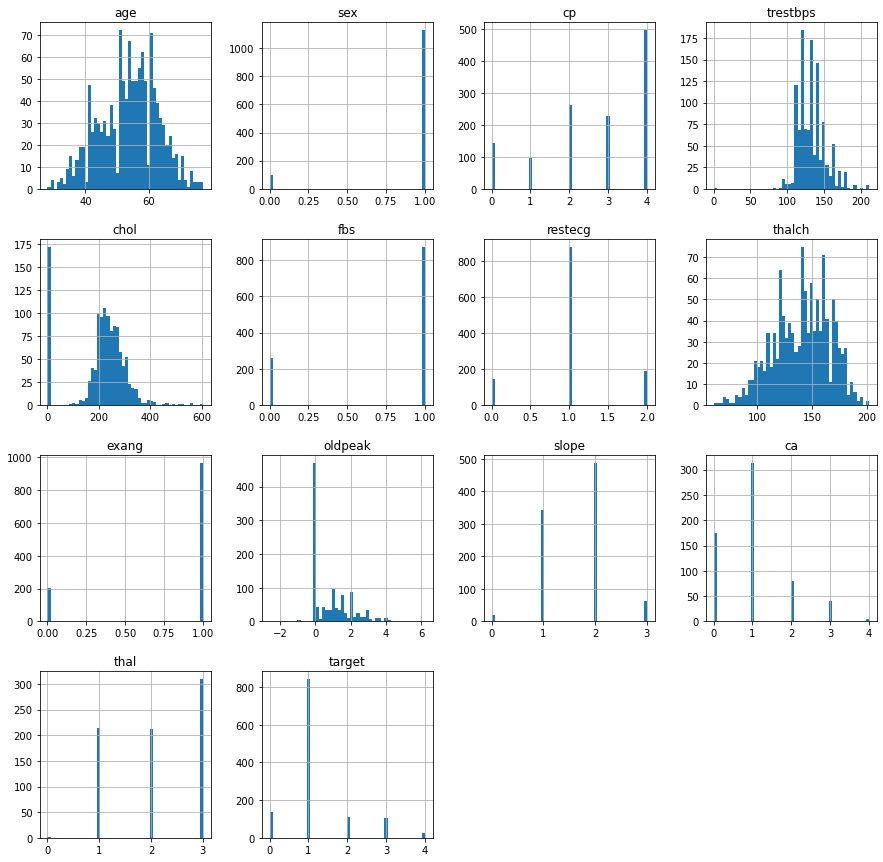

In [8]:
df.hist(figsize=(15,15),bins=50)

In [9]:
for i in df.columns:
    print(i,'------>',df[i].unique())

age ------> [63 67 37 41 56 62 57 53 44 52 48 54 49 64 58 61 51 66 43 69 59 42 55 65
 71 46 45 39 68 47 34 35 29 77 38 74 76 28 31 32 33 36 72 73 75 50 40 60
 70]
sex ------> [1 0]
cp ------> [1 4 3 2 0]
trestbps ------> [145. 161. 121. 131. 141. 172. 151. 111. 132. 117. 135. 112. 115. 124.
 125. 142. 128. 171. 155. 114. 181. 138. 118. 134. 122. 211.  94. 165.
 152. 126. 174. 148. 178. 158. 192. 129. 144. 123. 136. 146. 116. 156.
 154. 164.  98. 191.  nan 113.  92.  95.  81. 185.   0.  96. 127. 130.
 120. 140. 150. 110. 160. 105. 104. 108. 100. 102. 101. 180. 106. 170.
 200.]
chol ------> [233. 286. 229. 250. 204. 236. 268. 354. 254. 203. 192. 294. 256. 263.
 199. 168. 239. 275. 266. 211. 283. 284. 224. 206. 219. 340. 226. 247.
 167. 230. 335. 234. 177. 276. 353. 243. 225. 302. 212. 330. 175. 417.
 197. 198. 290. 253. 172. 273. 213. 305. 216. 304. 188. 282. 185. 232.
 326. 231. 269. 267. 248. 360. 258. 308. 245. 270. 208. 264. 321. 274.
 325. 235. 257. 164. 141. 252. 255. 201. 222. 260

## 3.  filling the null values

## Dist plot before filling the null values

In [12]:
import warnings 
warnings.filterwarnings('ignore')

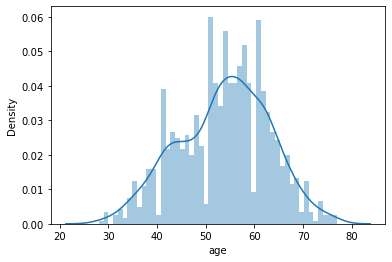

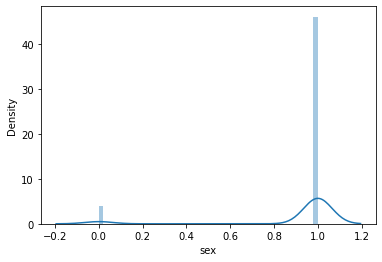

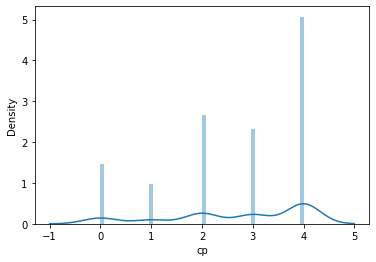

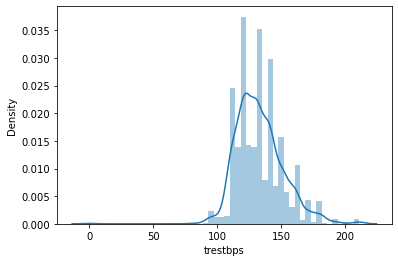

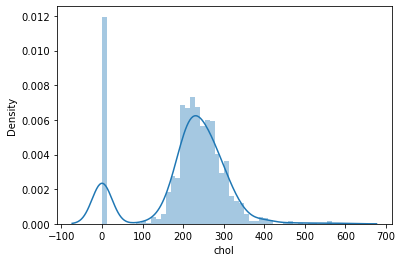

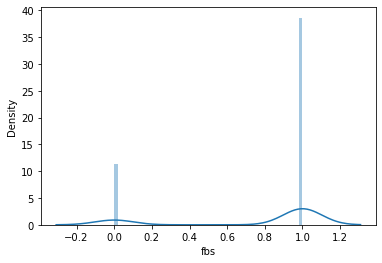

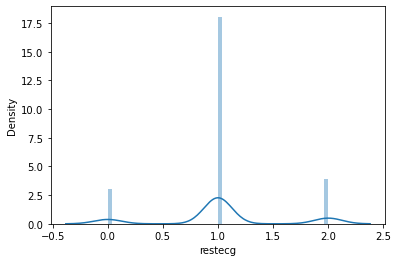

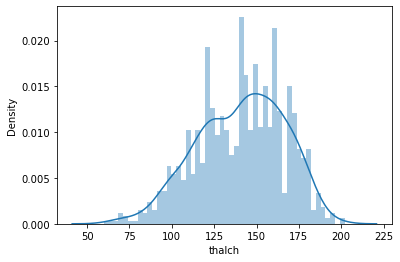

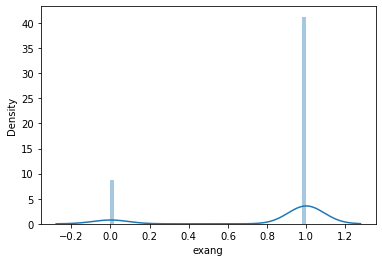

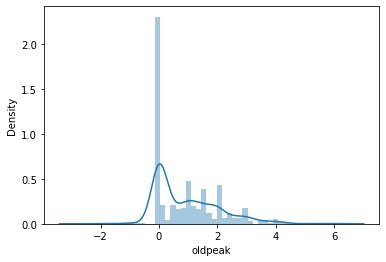

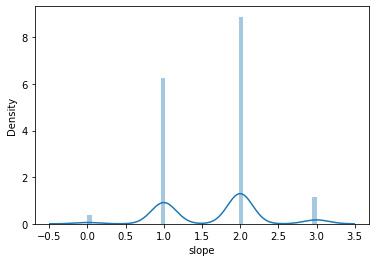

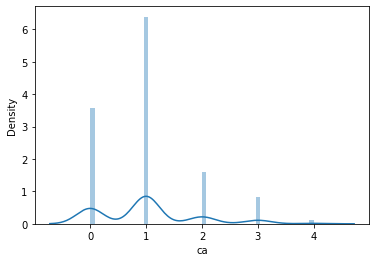

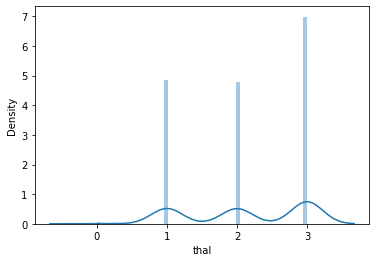

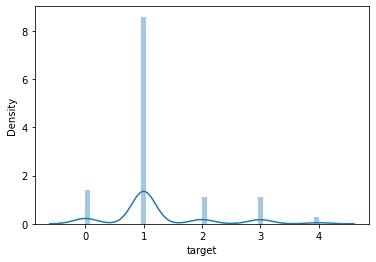

In [13]:
df_columns = df.columns
for i in df_columns:
    p = sns.distplot(a=df[i],kde=True,bins=50)
    plt.show()

## for filling the null values in 'trestbps','chol','thalch','oldpeak' variables are following the some normla distribution curves so here im using mean of that particular variables 

In [14]:
df['trestbps'] = df['trestbps'].fillna(df['trestbps'].mean())

In [15]:
df['chol'] = df['chol'].fillna(df['chol'].mean())
df['thalch'] = df['thalch'].fillna(df['thalch'].mean())
df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].mean())

## for filling the remaining variables that their are following some kind of order so we use the random sample imputer here to fill the null values

In [17]:
import feature_engine

In [18]:
from feature_engine.imputation import RandomSampleImputer

In [19]:
a = RandomSampleImputer(random_state=42,variables=['fbs','restecg','exang','slope','ca','thal'])

In [20]:
data = a.fit_transform(df)

In [21]:
data.head()

age  sex  cp  trestbps   chol  fbs  restecg  thalch  exang  oldpeak  slope  \
0   63    1   1     145.0  233.0  1.0      2.0   150.0    1.0      2.3    3.0   
1   67    1   4     161.0  286.0  1.0      2.0   108.0    1.0      1.5    2.0   
2   67    1   4     121.0  229.0  1.0      2.0   129.0    1.0      2.6    2.0   
3   37    1   3     131.0  250.0  1.0      1.0   187.0    1.0      3.5    3.0   
4   41    1   2     131.0  204.0  1.0      2.0   172.0    1.0      1.4    1.0   

    ca  thal  target  
0  1.0   2.0       1  
1  3.0   1.0       2  
2  2.0   3.0       1  
3  1.0   1.0       1  
4  1.0   1.0       1

In [22]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Dist plot after filling the null values

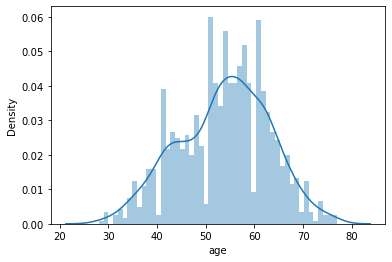

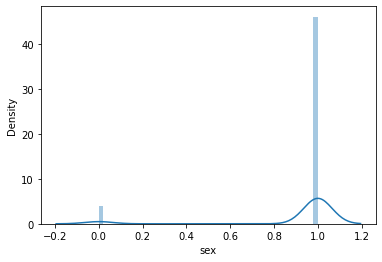

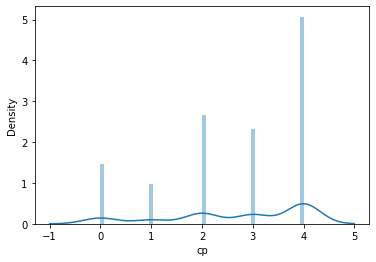

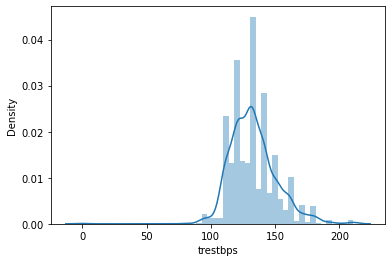

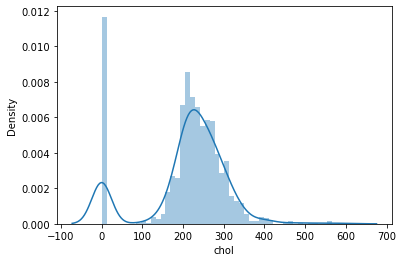

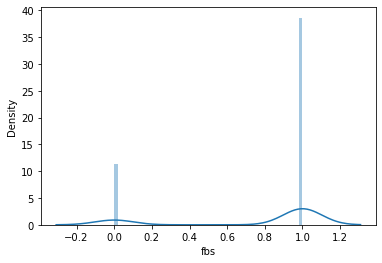

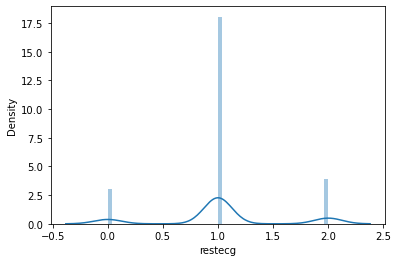

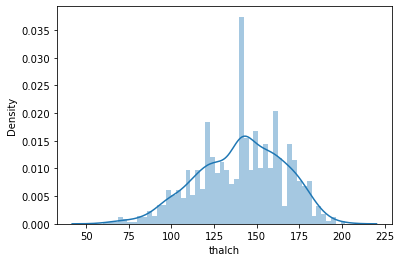

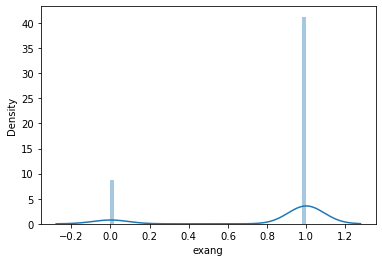

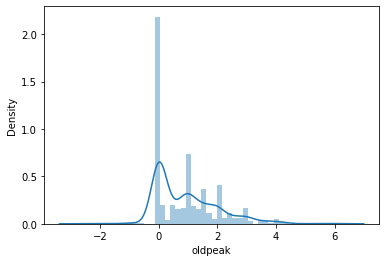

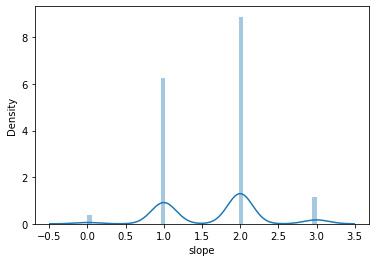

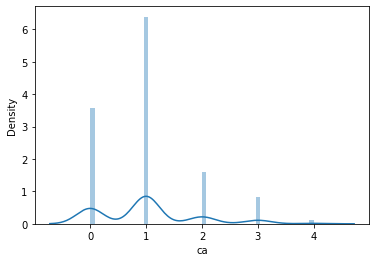

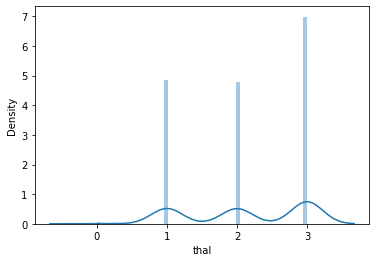

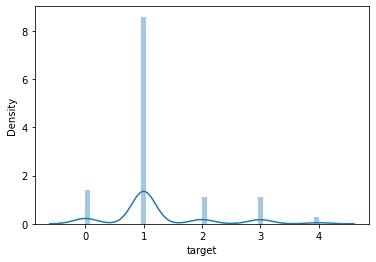

In [23]:
data_columns = data.columns
for i in data_columns:
    p = sns.distplot(a=df[i],kde=True,bins=50)
    plt.show()

## 4. splitting the data

In [24]:
import sklearn

In [25]:
from sklearn.model_selection import train_test_split

In [27]:
x = data.drop(['target'],axis=1)
y = data['target']

## 5. checking the imbalance data

In [31]:
import imblearn

In [32]:
from imblearn.over_sampling import SMOTE

In [33]:
sm = SMOTE(random_state=42,k_neighbors=2)

In [34]:
y.value_counts()

1    841
0    138
2    109
3    107
4     28
Name: target, dtype: int64

In [35]:
x_bal,y_bal = sm.fit_resample(x,y)

In [36]:
y_bal.value_counts()

1    841
2    841
3    841
4    841
0    841
Name: target, dtype: int64

In [76]:
x_train,x_test,y_train,y_test = train_test_split(x_bal,y_bal,test_size=0.25,random_state=42)

In [77]:
x_train.head()

age  sex  cp    trestbps        chol  fbs   restecg      thalch  \
1592   55    1   0  140.448510  217.074752  0.0  1.000000  110.551490   
423    51    1   2  125.000000  188.000000  1.0  1.000000  145.000000   
3240   64    1   4  132.868557  306.392138  1.0  1.065356  140.684932   
1281   60    1   0  147.112750  203.063375  0.0  1.000000  161.063375   
4051   63    1   4  135.575667  251.929706  1.0  1.000000  140.092813   

         exang   oldpeak     slope        ca      thal  
1592  0.925248  5.330894  0.074752  0.074752  3.000000  
423   1.000000  0.000000  1.000000  1.000000  1.000000  
3240  1.000000  0.920758  2.000000  1.000000  1.065356  
1281  0.000000  0.050700  2.000000  1.063375  2.936625  
4051  1.000000  3.582741  2.864493  1.000000  2.000000

In [78]:
y_train.head()

1592    0
423     1
3240    3
1281    0
4051    4
Name: target, dtype: int64

In [79]:
x_test.head()

age  sex  cp    trestbps        chol  fbs  restecg      thalch  exang  \
676    61    1   4  131.000000    0.000000  1.0   1.0000  130.000000    1.0   
1831   50    0   0  142.943304  308.371131  0.0   0.0000  146.685565    1.0   
3733   55    1   4  121.770398    0.000000  1.0   1.0000   92.616318    1.0   
3734   59    1   3  138.518171  209.862800  1.0   1.4657  136.640358    1.0   
4150   61    1   4  134.579284  261.157115  1.0   1.0000  140.310749    1.0   

       oldpeak     slope        ca     thal  
676   1.100000  3.000000  1.000000  2.00000  
1831  0.314435  1.000000  2.056696  3.00000  
3733  0.353928  1.077040  0.922960  2.92296  
3734  1.423361  2.000000  3.068600  2.53430  
4150  2.602967  2.546306  1.000000  2.00000

In [80]:
y_test.head()

676     1
1831    0
3733    4
3734    4
4150    4
Name: target, dtype: int64

## 6. checking the outliers

In [81]:
def outliers(df,var):
    plt.figure(figsize=(15,7))
    plt.subplot(1,2,1)
    sns.boxplot(y = df[var])
    plt.subplot(1,2,2)
    sns.distplot(a = df[var],kde=True,bins=50)

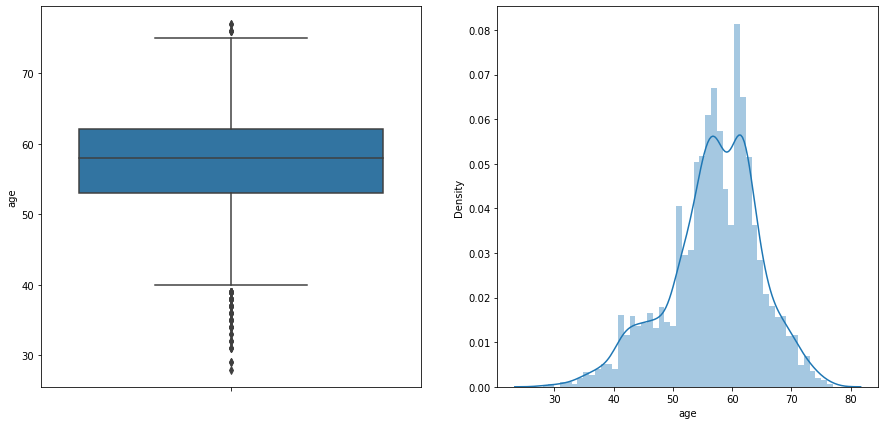

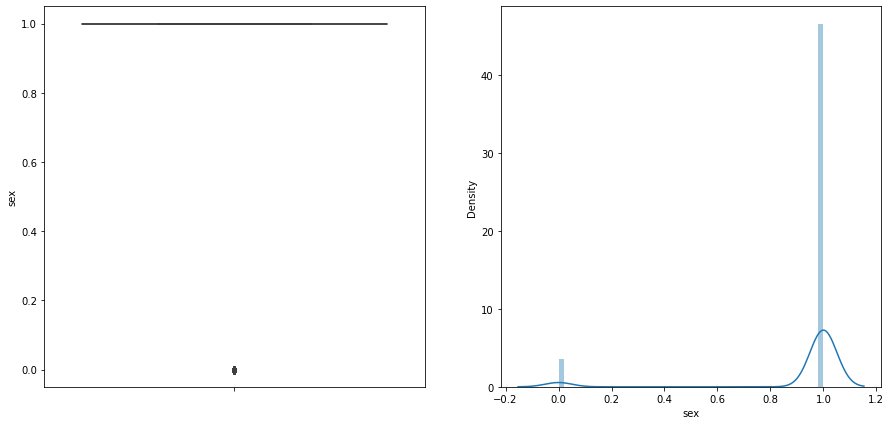

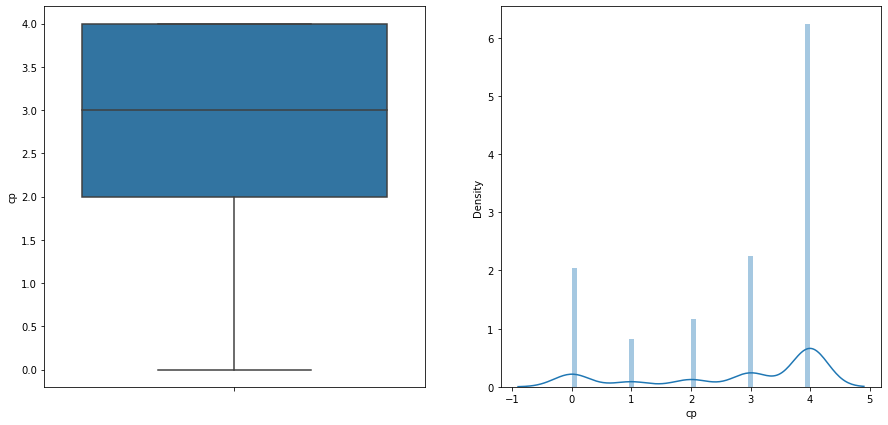

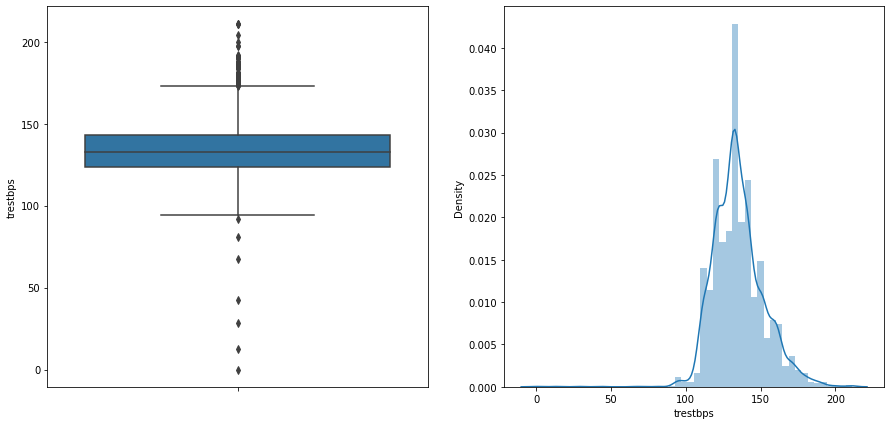

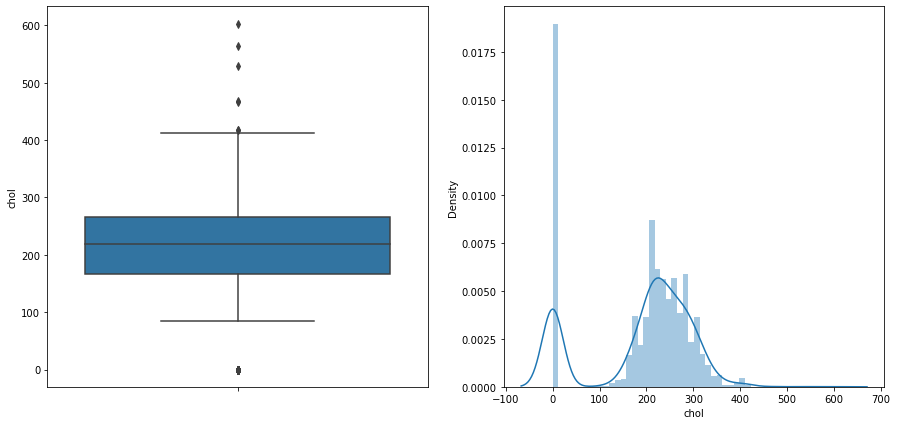

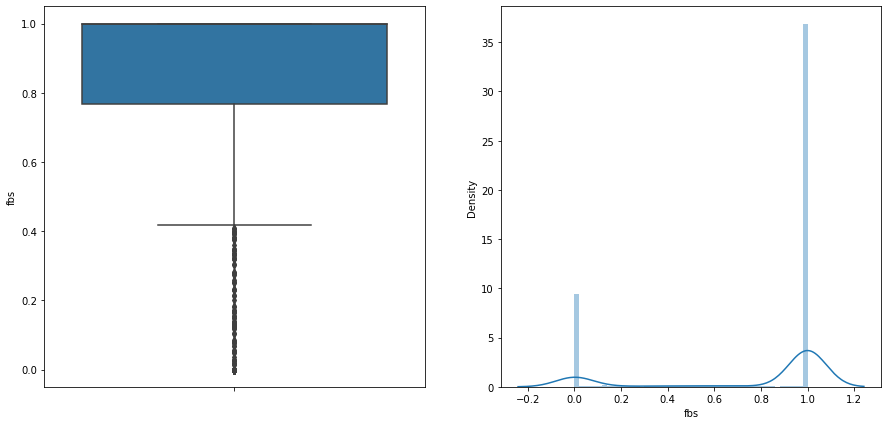

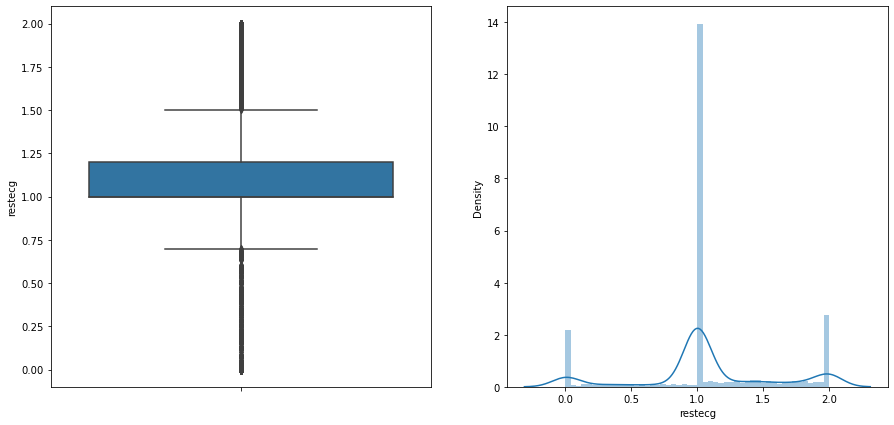

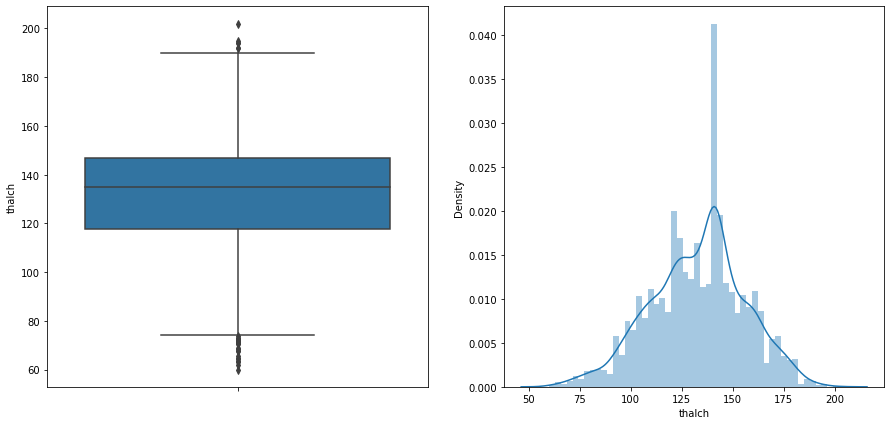

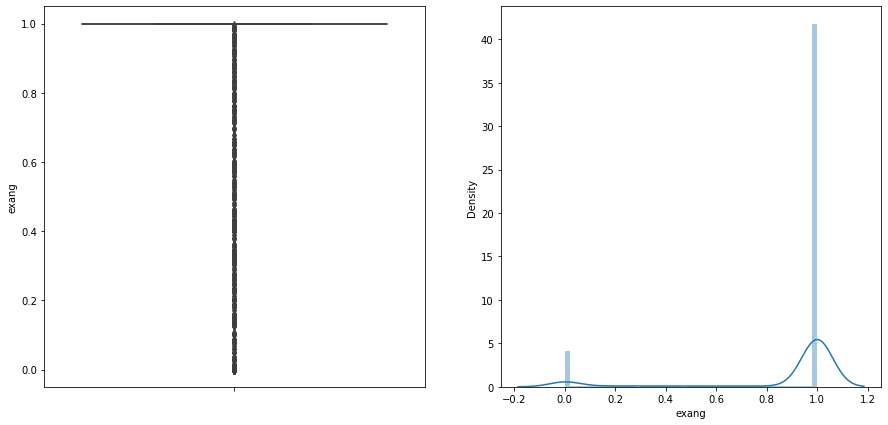

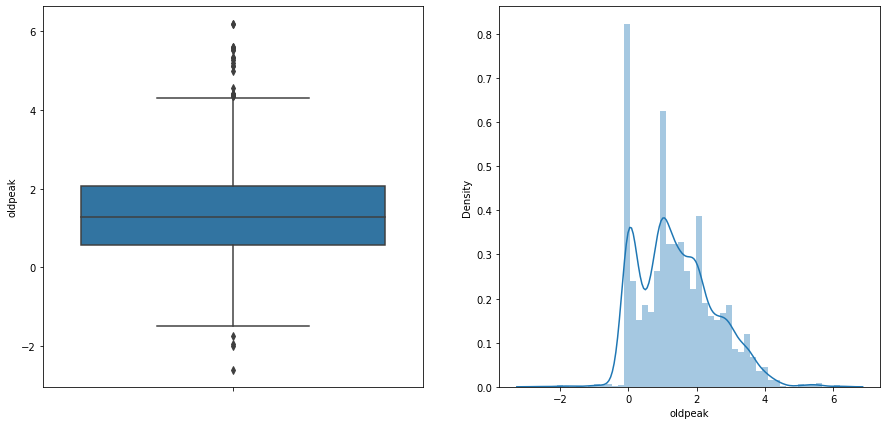

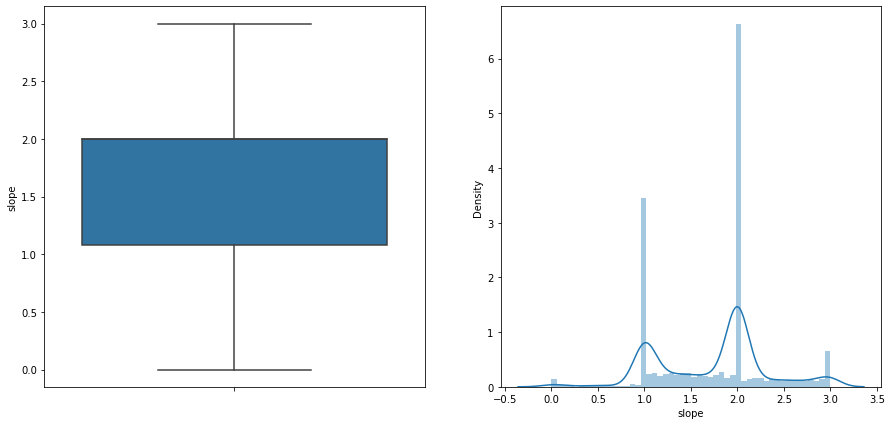

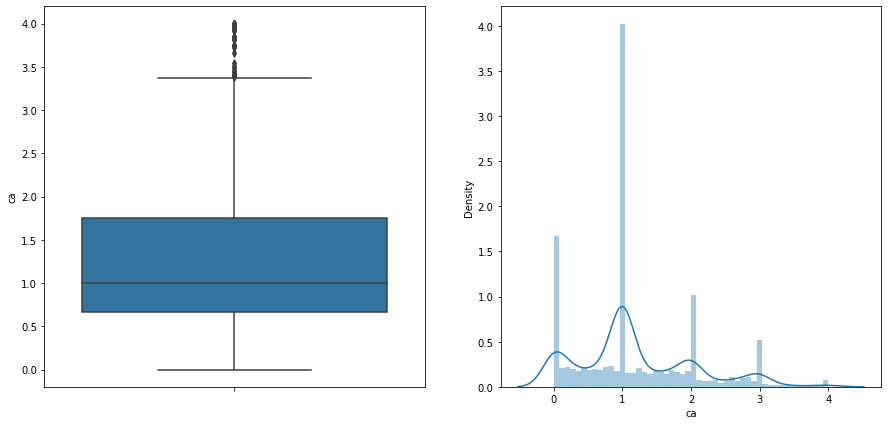

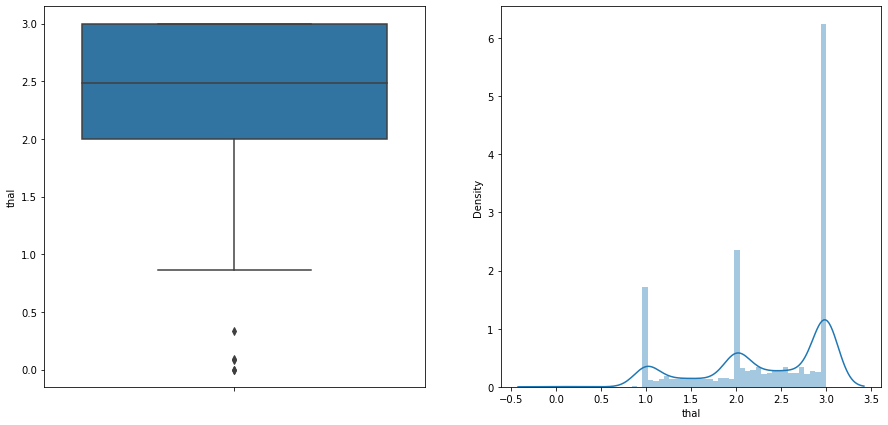

In [82]:
for i in x_train.columns:
    outliers(x_train,i)

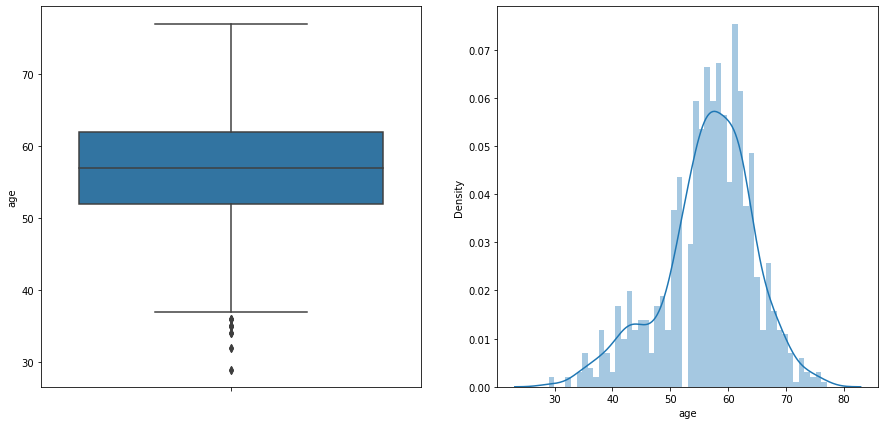

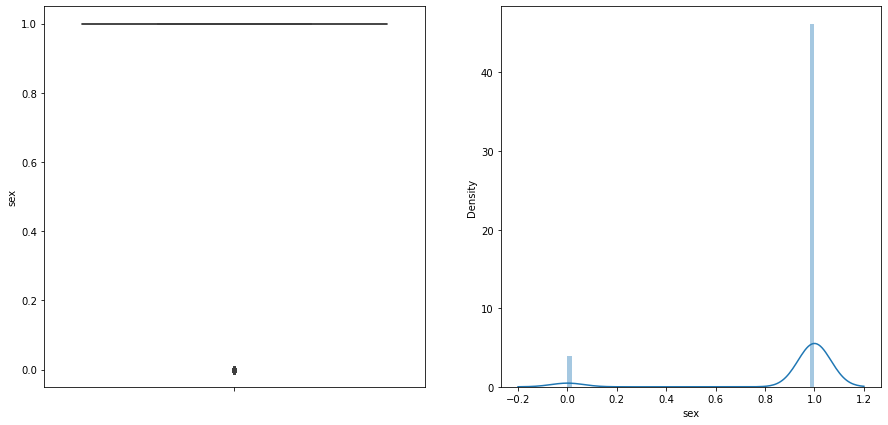

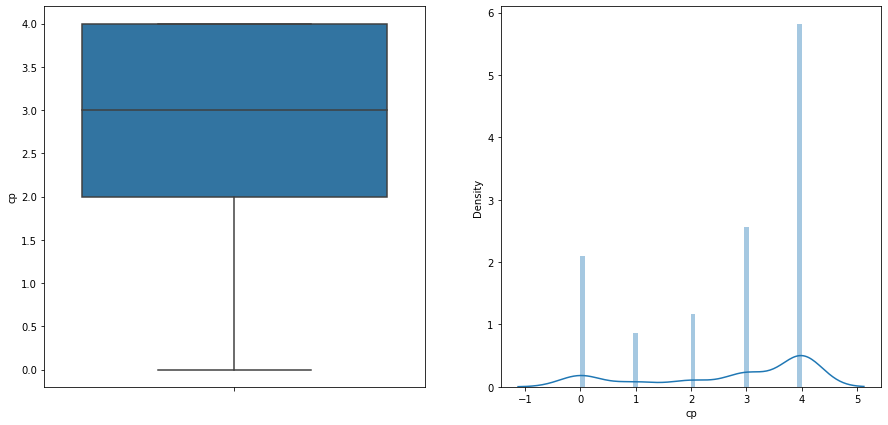

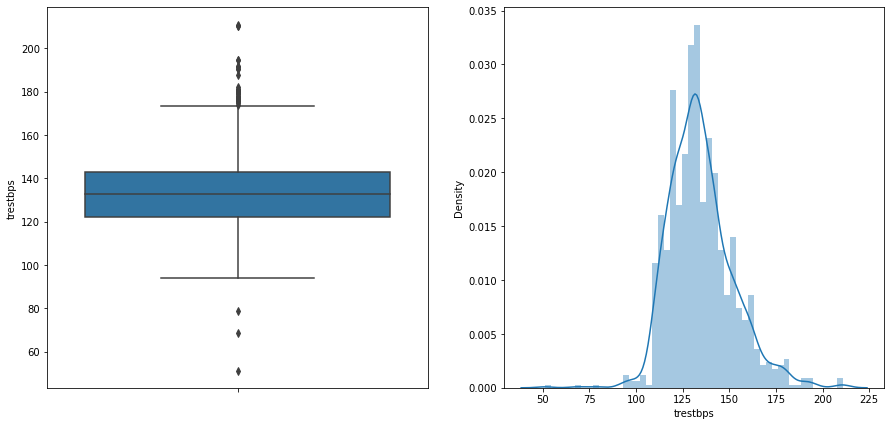

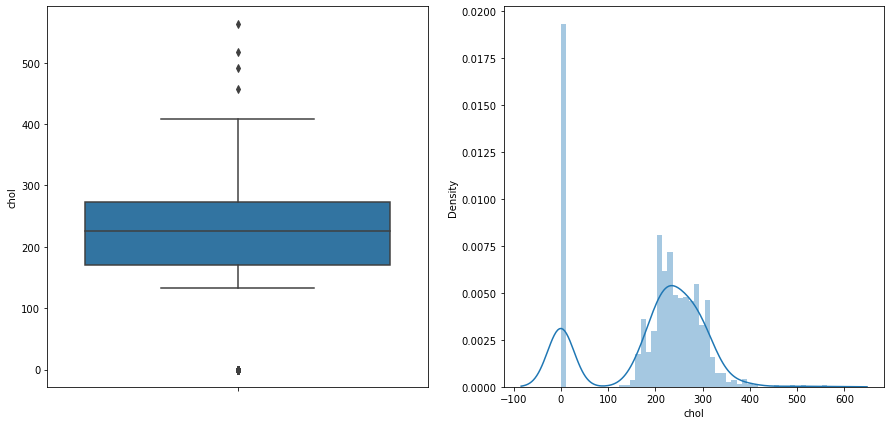

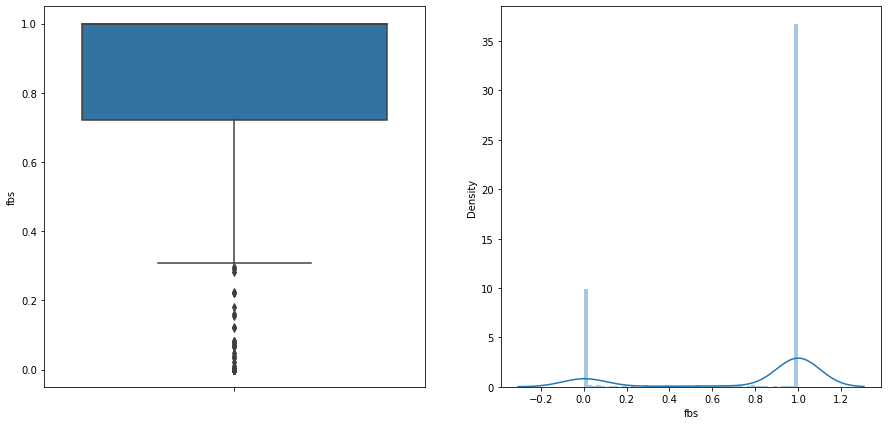

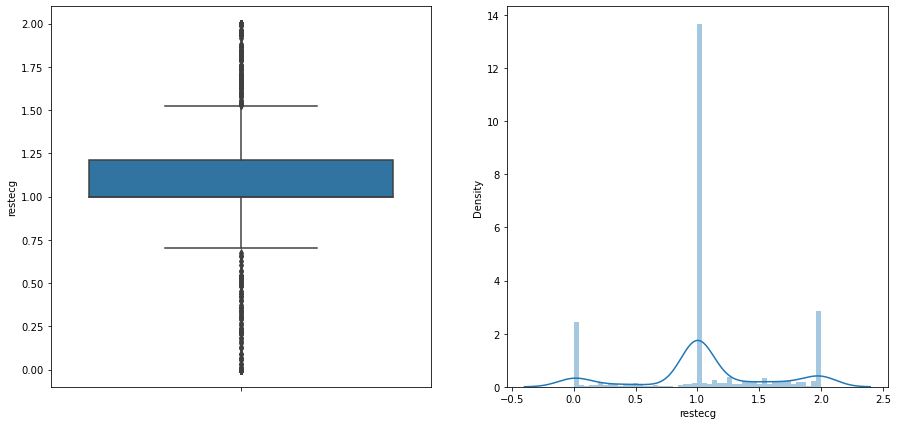

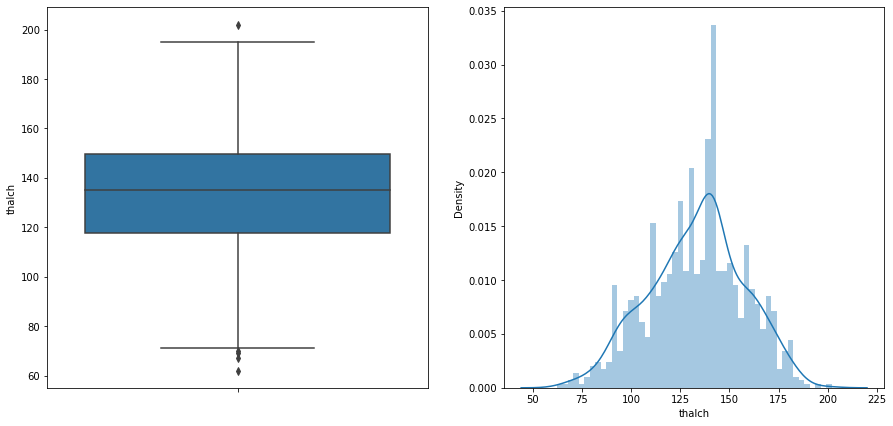

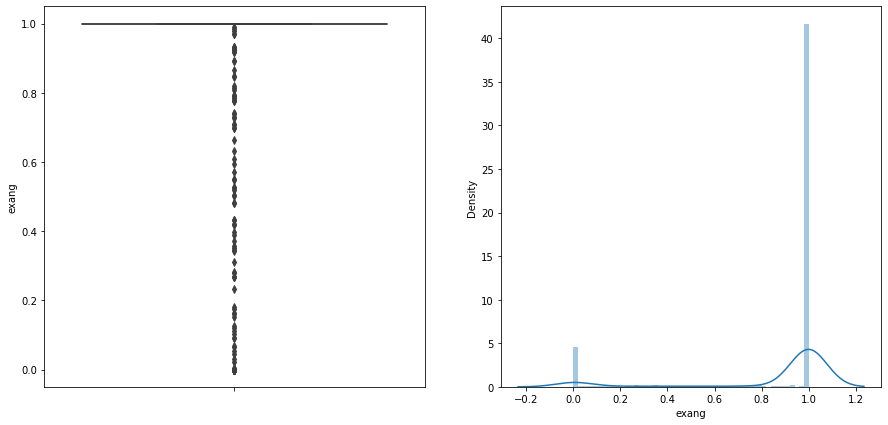

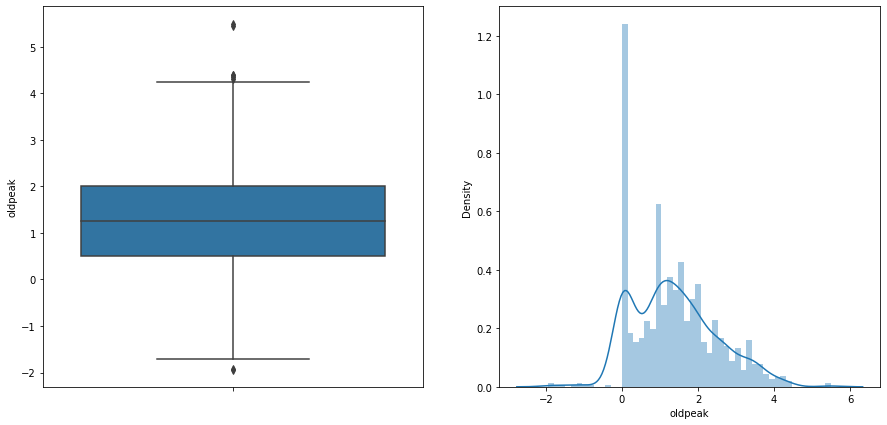

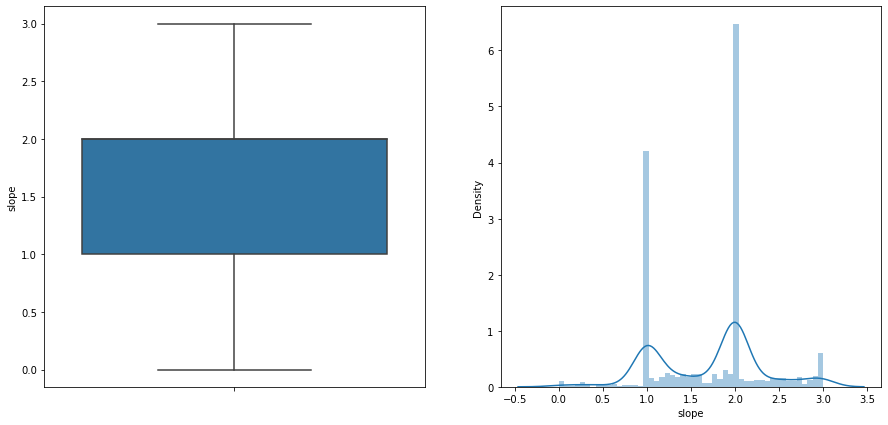

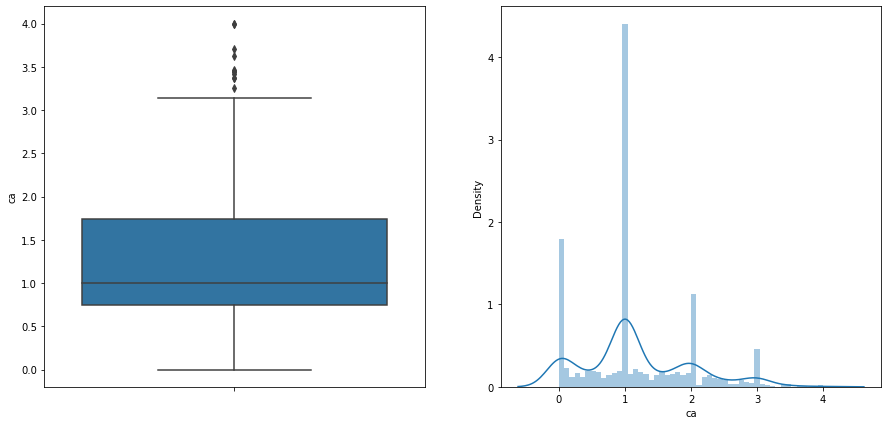

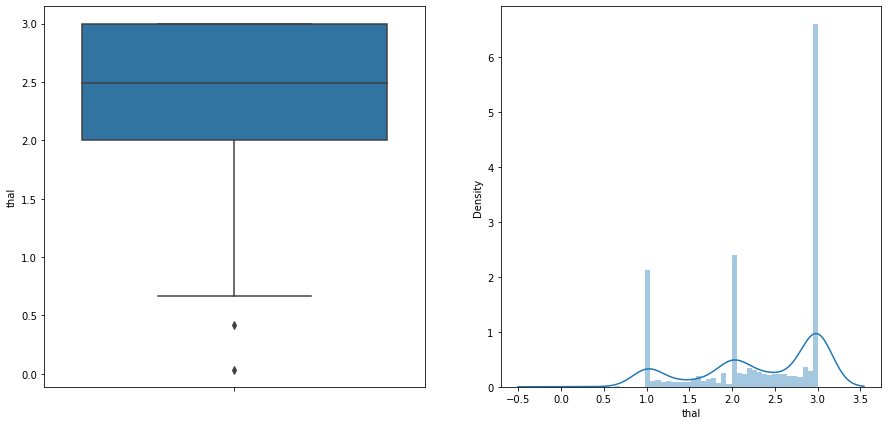

In [83]:
for i in x_test.columns:
    outliers(x_test,i)

## 7. Handling the outliers

In [84]:
from feature_engine.outliers import Winsorizer

In [85]:
a = Winsorizer(capping_method='quantiles',fold=0.05,tail='both',variables=['oldpeak','chol','trestbps','thal','ca'])

In [86]:
a.fit(x_train,y_train)

Winsorizer(capping_method='quantiles', fold=0.05, tail='both',
           variables=['oldpeak', 'chol', 'trestbps', 'thal', 'ca'])

In [87]:
x_train = a.transform(x_train)
x_test = a.transform(x_test)

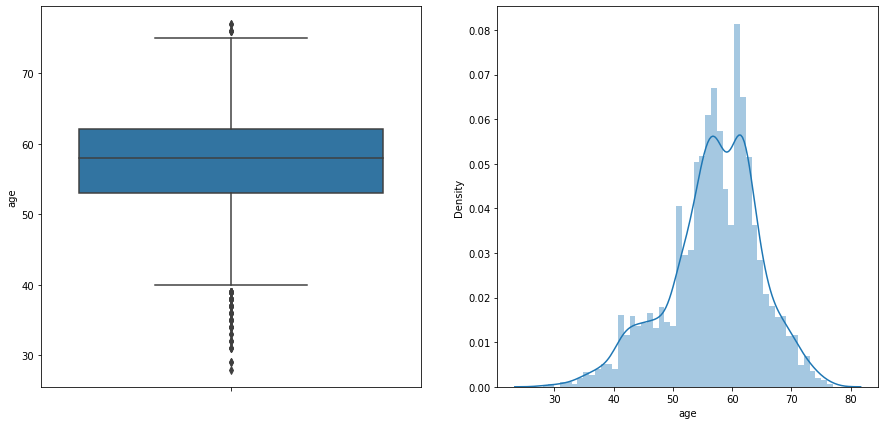

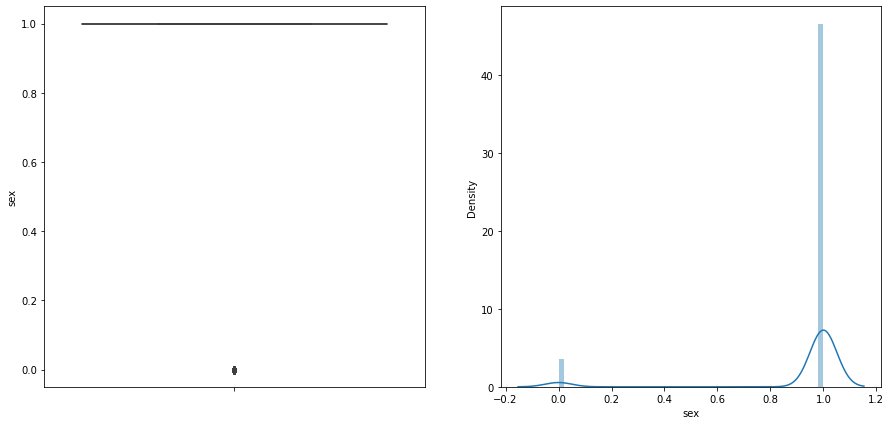

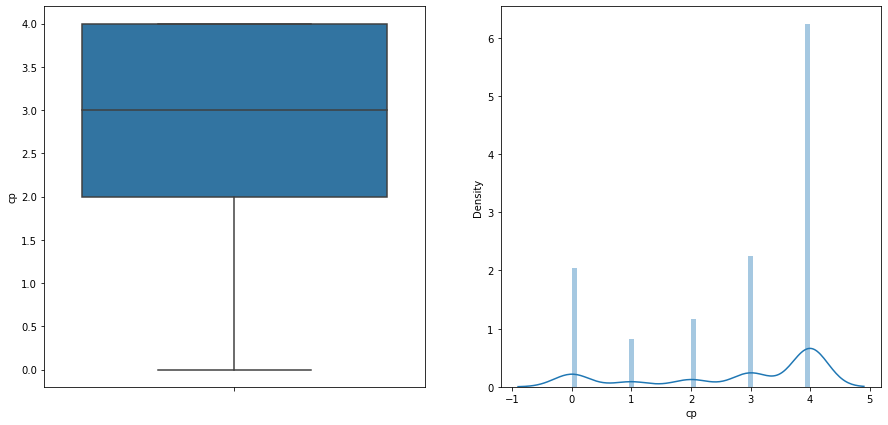

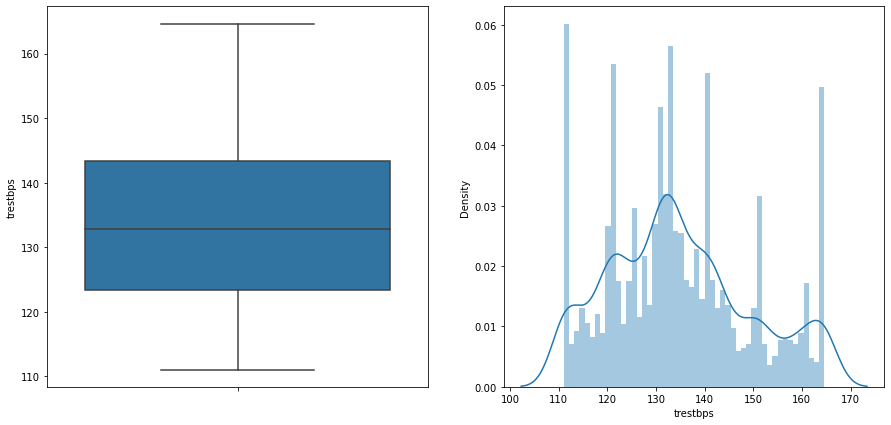

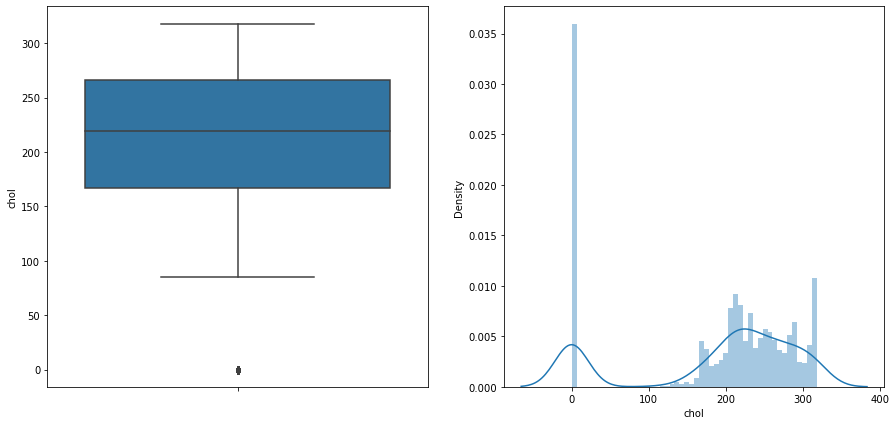

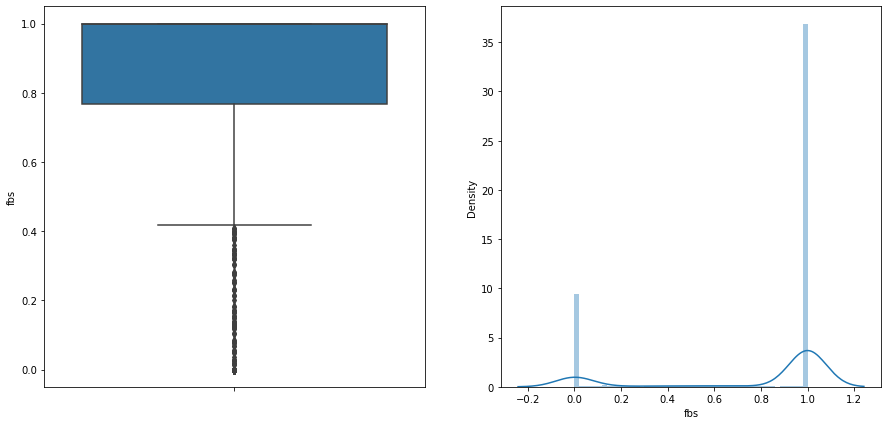

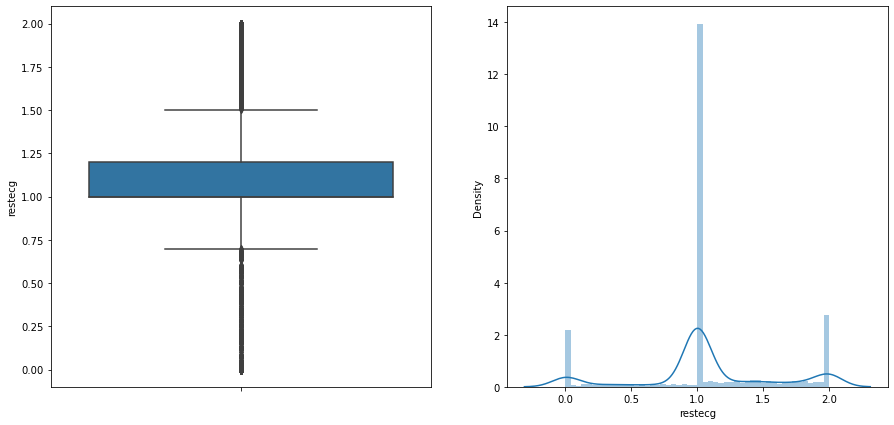

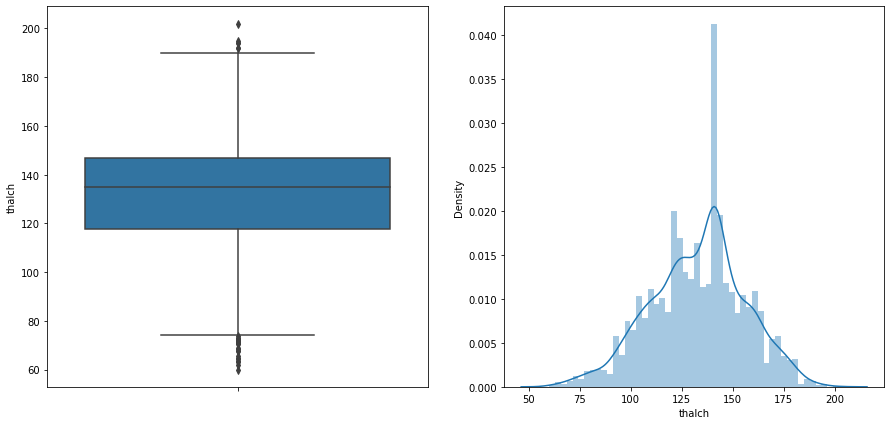

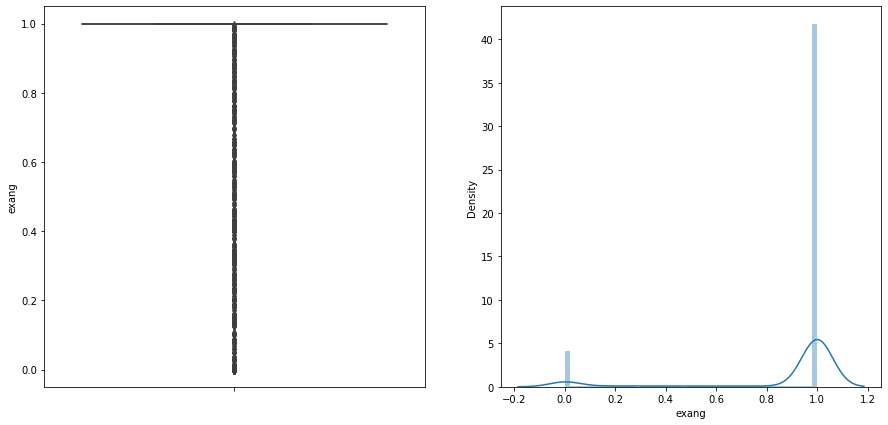

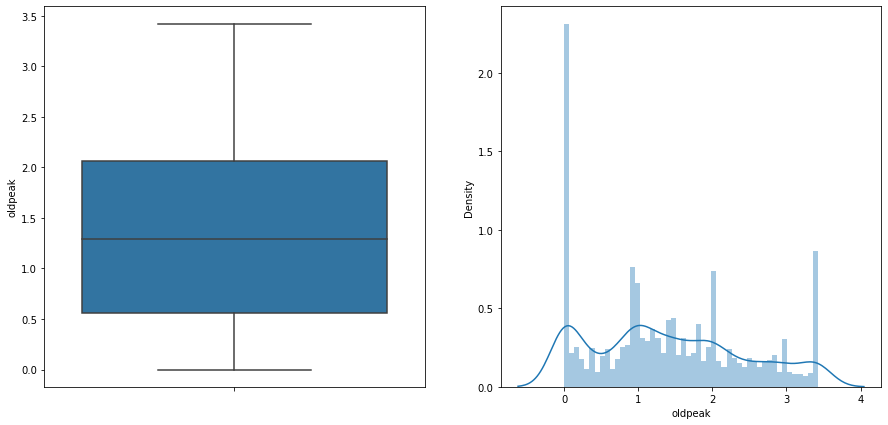

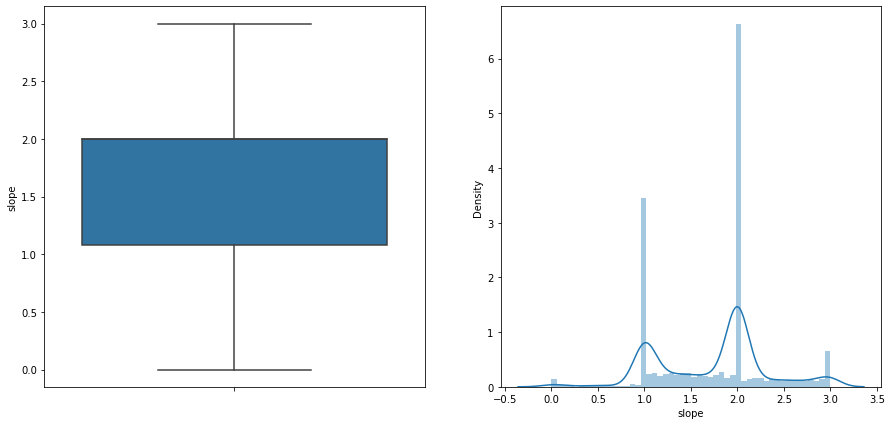

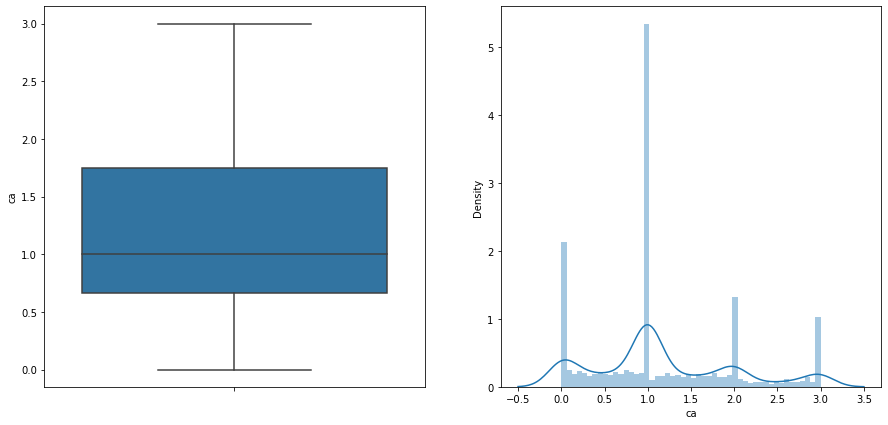

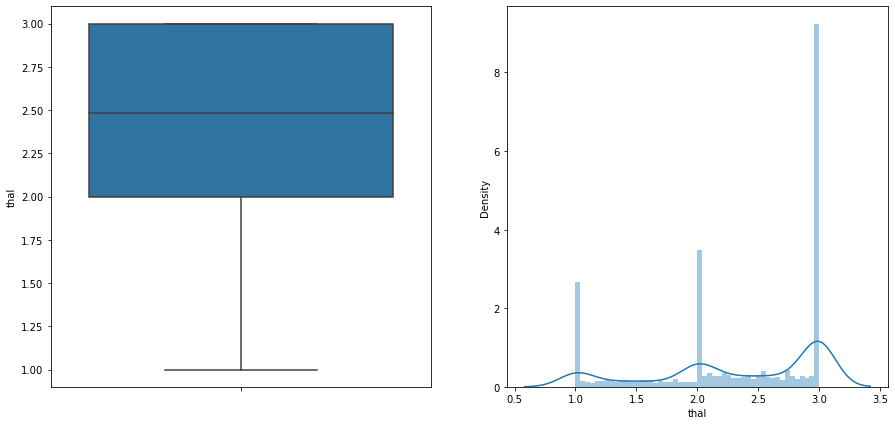

In [88]:
for i in x_train.columns:
    outliers(x_train,i)

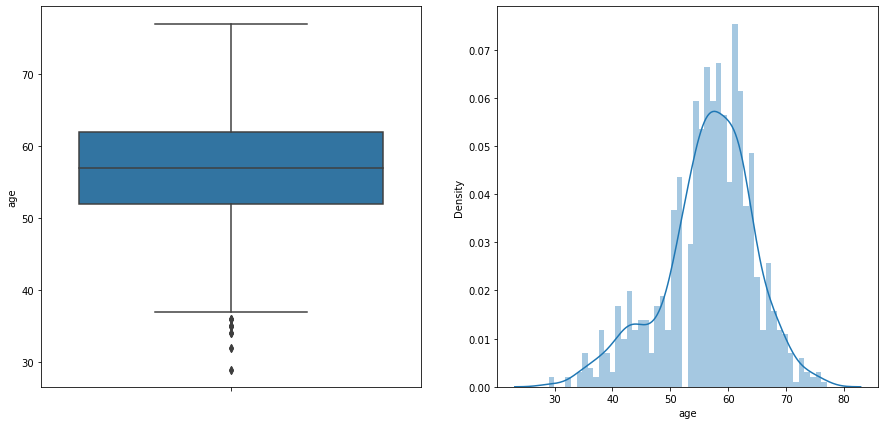

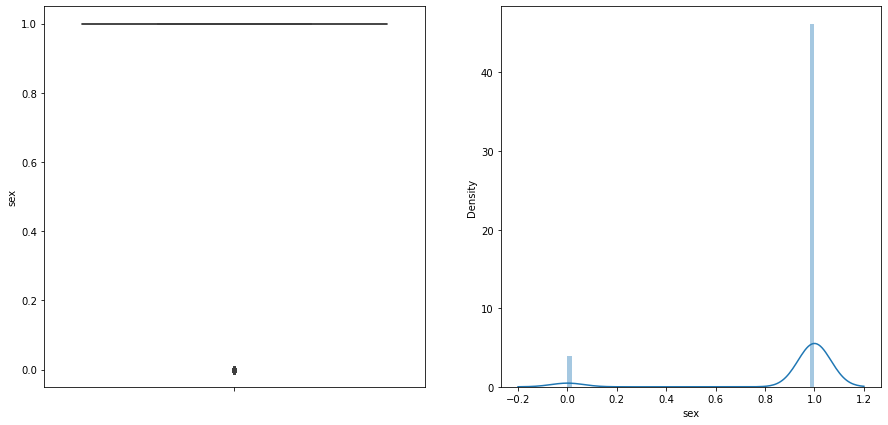

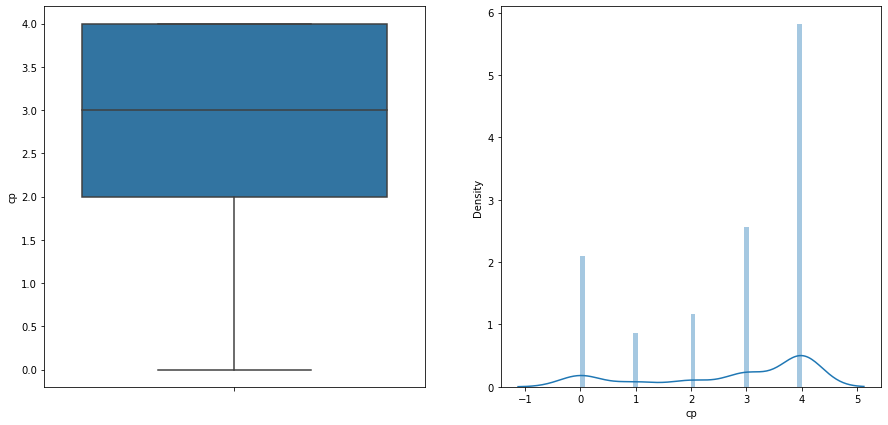

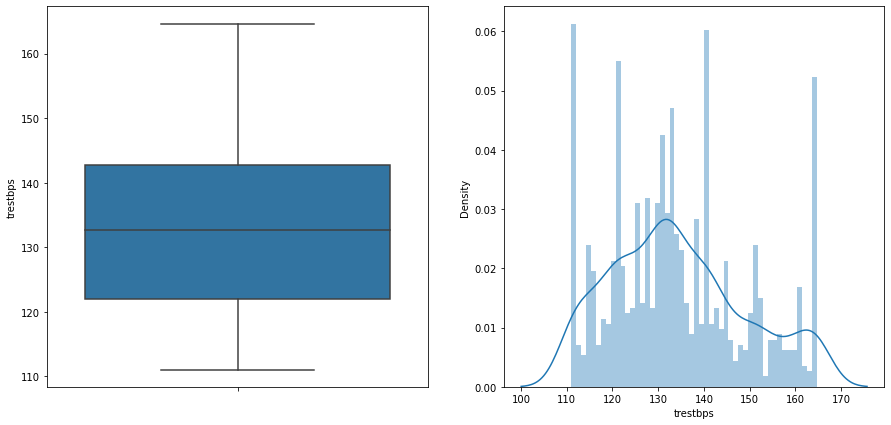

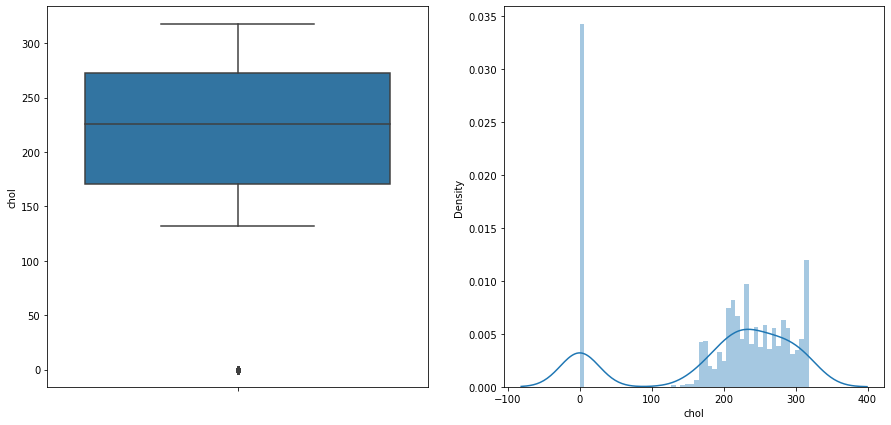

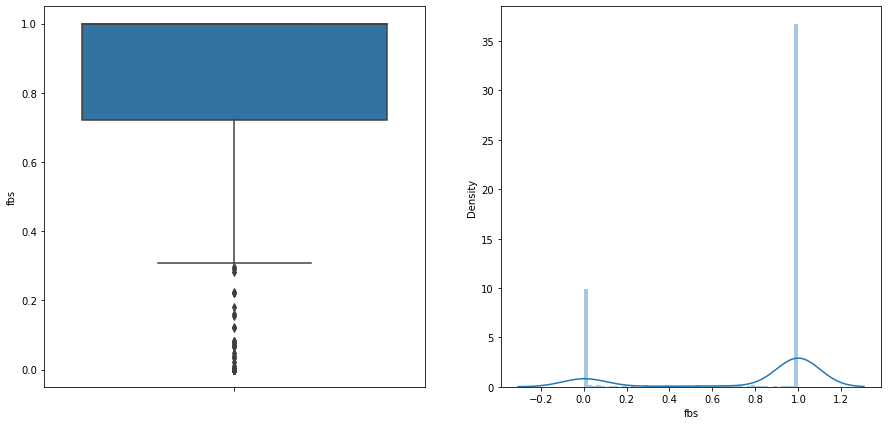

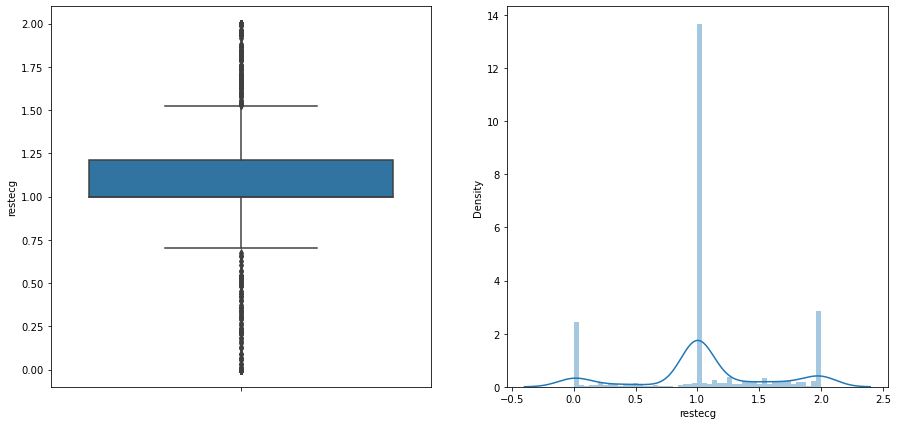

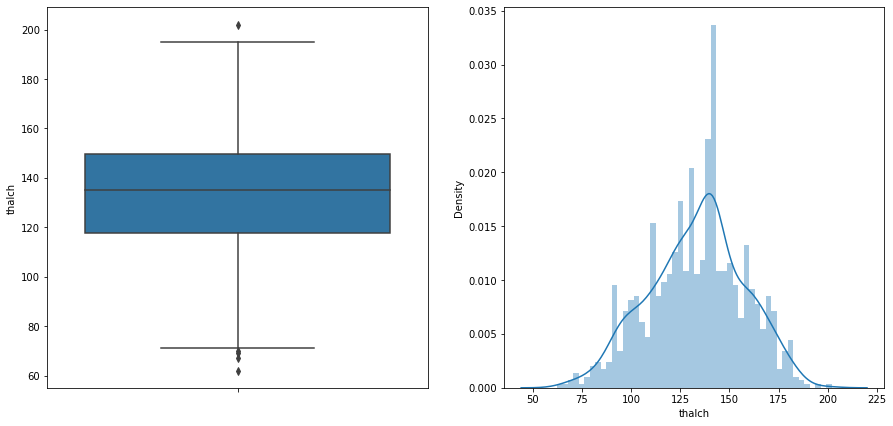

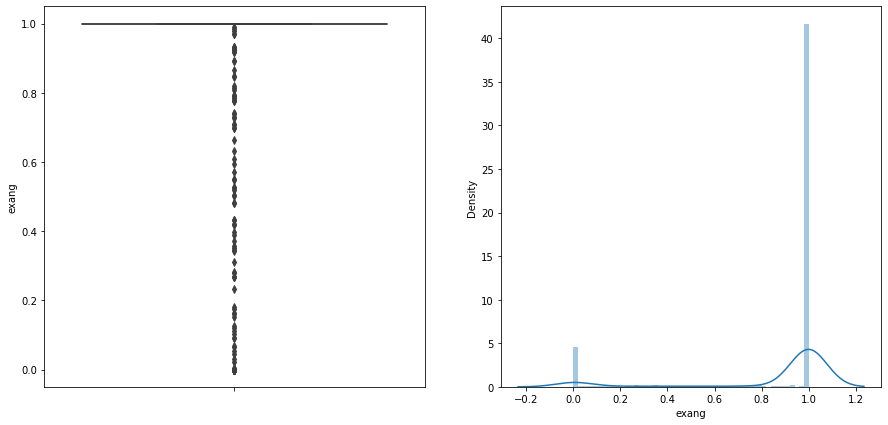

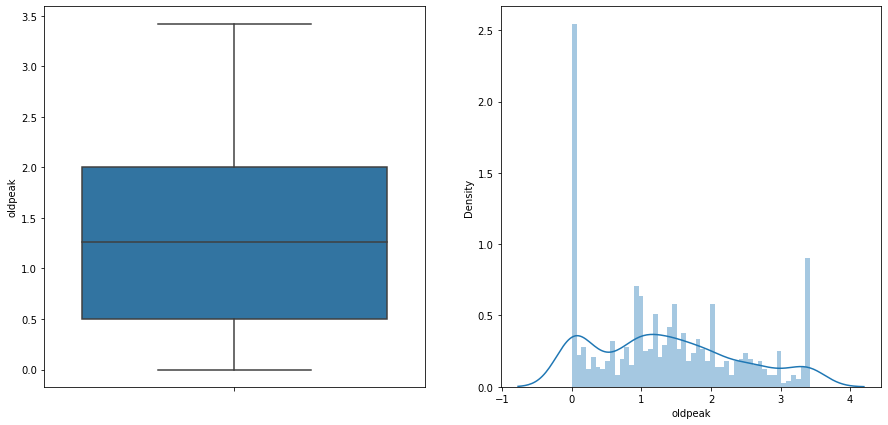

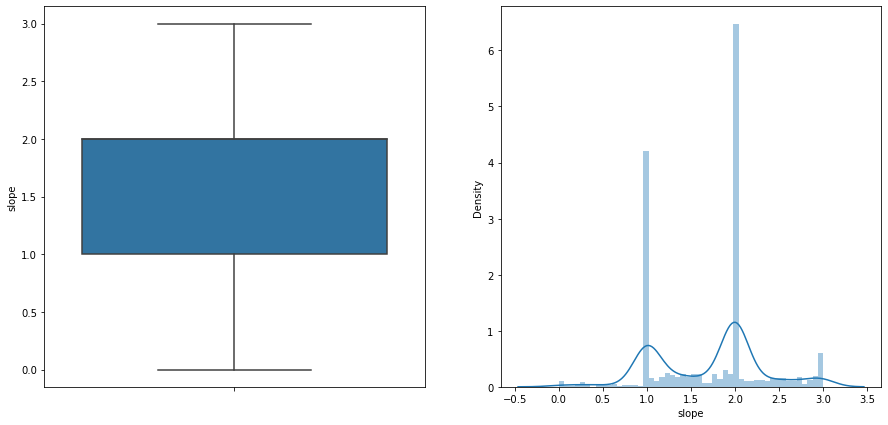

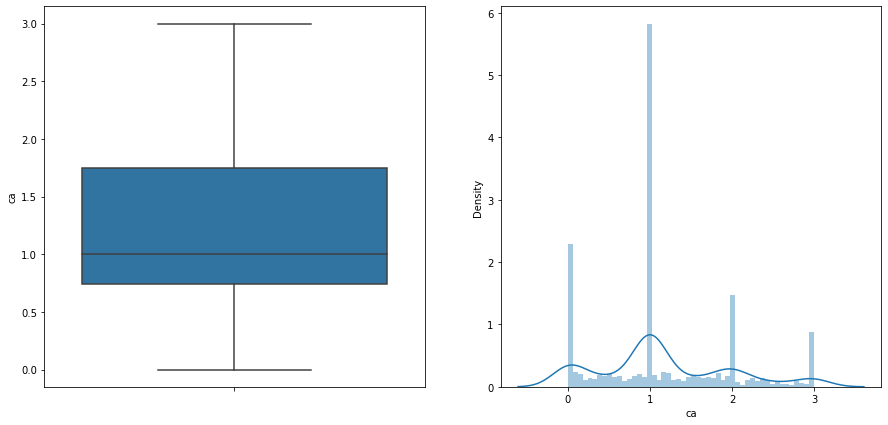

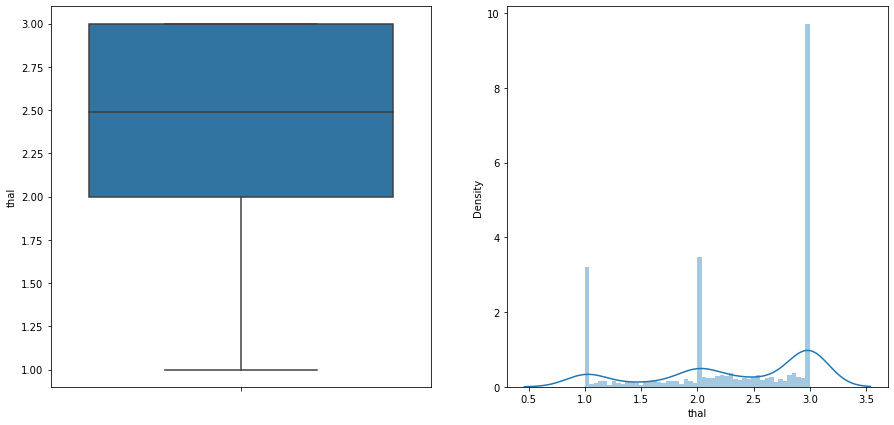

In [89]:
for i in x_test.columns:
    outliers(x_test,i)

## 8. Checking the correlation

In [90]:
x_train.corr()

age       sex        cp  trestbps      chol       fbs  \
age       1.000000  0.009962  0.124360  0.288014  0.034033  0.114237   
sex       0.009962  1.000000  0.425491 -0.064065 -0.186503  0.423615   
cp        0.124360  0.425491  1.000000  0.087254 -0.265583  0.750028   
trestbps  0.288014 -0.064065  0.087254  1.000000  0.105658  0.099924   
chol      0.034033 -0.186503 -0.265583  0.105658  1.000000 -0.162105   
fbs       0.114237  0.423615  0.750028  0.099924 -0.162105  1.000000   
restecg   0.084104  0.287482  0.539319  0.087193 -0.002115  0.534725   
thalch   -0.240014 -0.152330 -0.270456 -0.090547  0.358819 -0.185565   
exang     0.075912  0.381196  0.526519  0.079338 -0.213598  0.606891   
oldpeak   0.246306  0.001698  0.044654  0.151084  0.160770  0.010487   
slope     0.119836  0.261918  0.423886  0.081877 -0.027640  0.406569   
ca        0.176217  0.073349  0.056608  0.033080  0.155920  0.165091   
thal      0.007656 -0.040556 -0.067550  0.045908  0.005784 -0.115410   

           restecg    thalch     exang   oldpeak     slope        ca      thal  
age       0.084104 -0.240014  0.075912  0.246306  0.119836  0.176217  0.007656  
sex       0.287482 -0.152330  0.381196  0.001698  0.261918  0.073349 -0.040556  
cp        0.539319 -0.270456  0.526519  0.044654  0.423886  0.056608 -0.067550  
trestbps  0.087193 -0.090547  0.079338  0.151084  0.081877  0.033080  0.045908  
chol     -0.002115  0.358819 -0.213598  0.160770 -0.027640  0.155920  0.005784  
fbs       0.534725 -0.185565  0.606891  0.010487  0.406569  0.165091 -0.115410  
restecg   1.000000 -0.057696  0.418275  0.088248  0.294498  0.153350 -0.042833  
thalch   -0.057696  1.000000 -0.308485 -0.058320 -0.158420  0.021901 -0.049769  
exang     0.418275 -0.308485  1.000000  0.104392  0.246210  0.098194 -0.014379  
oldpeak   0.088248 -0.058320  0.104392  1.000000  0.148171  0.122933  0.138047  
slope     0.294498 -0.158420  0.246210  0.148171  1.000000  0.108759 -0.033568  
ca        0.153350  0.021901  0.098194  0.122933  0.108759  1.000000  0.082860  
thal     -0.042833 -0.049769 -0.014379  0.138047 -0.033568  0.082860  1.000000

In [91]:
x_test.corr()

age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.041979  0.076901  0.287857  0.042080  0.064235   
sex      -0.041979  1.000000  0.445876 -0.089652 -0.173855  0.448154   
cp        0.076901  0.445876  1.000000  0.072669 -0.281754  0.730022   
trestbps  0.287857 -0.089652  0.072669  1.000000  0.139607  0.075064   
chol      0.042080 -0.173855 -0.281754  0.139607  1.000000 -0.167379   
fbs       0.064235  0.448154  0.730022  0.075064 -0.167379  1.000000   
restecg   0.106982  0.263616  0.555955  0.094678 -0.018620  0.569429   
thalch   -0.261780 -0.087798 -0.268788 -0.122537  0.333236 -0.138491   
exang     0.016083  0.337160  0.509408  0.042027 -0.208180  0.630301   
oldpeak   0.241093 -0.000522 -0.004987  0.121856  0.131470  0.017999   
slope     0.127743  0.273127  0.464210  0.098323 -0.059069  0.406072   
ca        0.160130  0.082814  0.048658  0.091273  0.172814  0.124017   
thal      0.012640 -0.069974 -0.081895  0.036123  0.047152 -0.089973   

           restecg    thalch     exang   oldpeak     slope        ca      thal  
age       0.106982 -0.261780  0.016083  0.241093  0.127743  0.160130  0.012640  
sex       0.263616 -0.087798  0.337160 -0.000522  0.273127  0.082814 -0.069974  
cp        0.555955 -0.268788  0.509408 -0.004987  0.464210  0.048658 -0.081895  
trestbps  0.094678 -0.122537  0.042027  0.121856  0.098323  0.091273  0.036123  
chol     -0.018620  0.333236 -0.208180  0.131470 -0.059069  0.172814  0.047152  
fbs       0.569429 -0.138491  0.630301  0.017999  0.406072  0.124017 -0.089973  
restecg   1.000000 -0.068726  0.439616  0.108503  0.323101  0.194019 -0.054014  
thalch   -0.068726  1.000000 -0.263648 -0.063592 -0.139043  0.012867 -0.115655  
exang     0.439616 -0.263648  1.000000  0.116341  0.219942  0.107444 -0.036107  
oldpeak   0.108503 -0.063592  0.116341  1.000000  0.117618  0.147658  0.181455  
slope     0.323101 -0.139043  0.219942  0.117618  1.000000  0.126389 -0.000470  
ca        0.194019  0.012867  0.107444  0.147658  0.126389  1.000000  0.107457  
thal     -0.054014 -0.115655 -0.036107  0.181455 -0.000470  0.107457  1.000000

## pair plot to check the graphical relation between the variables

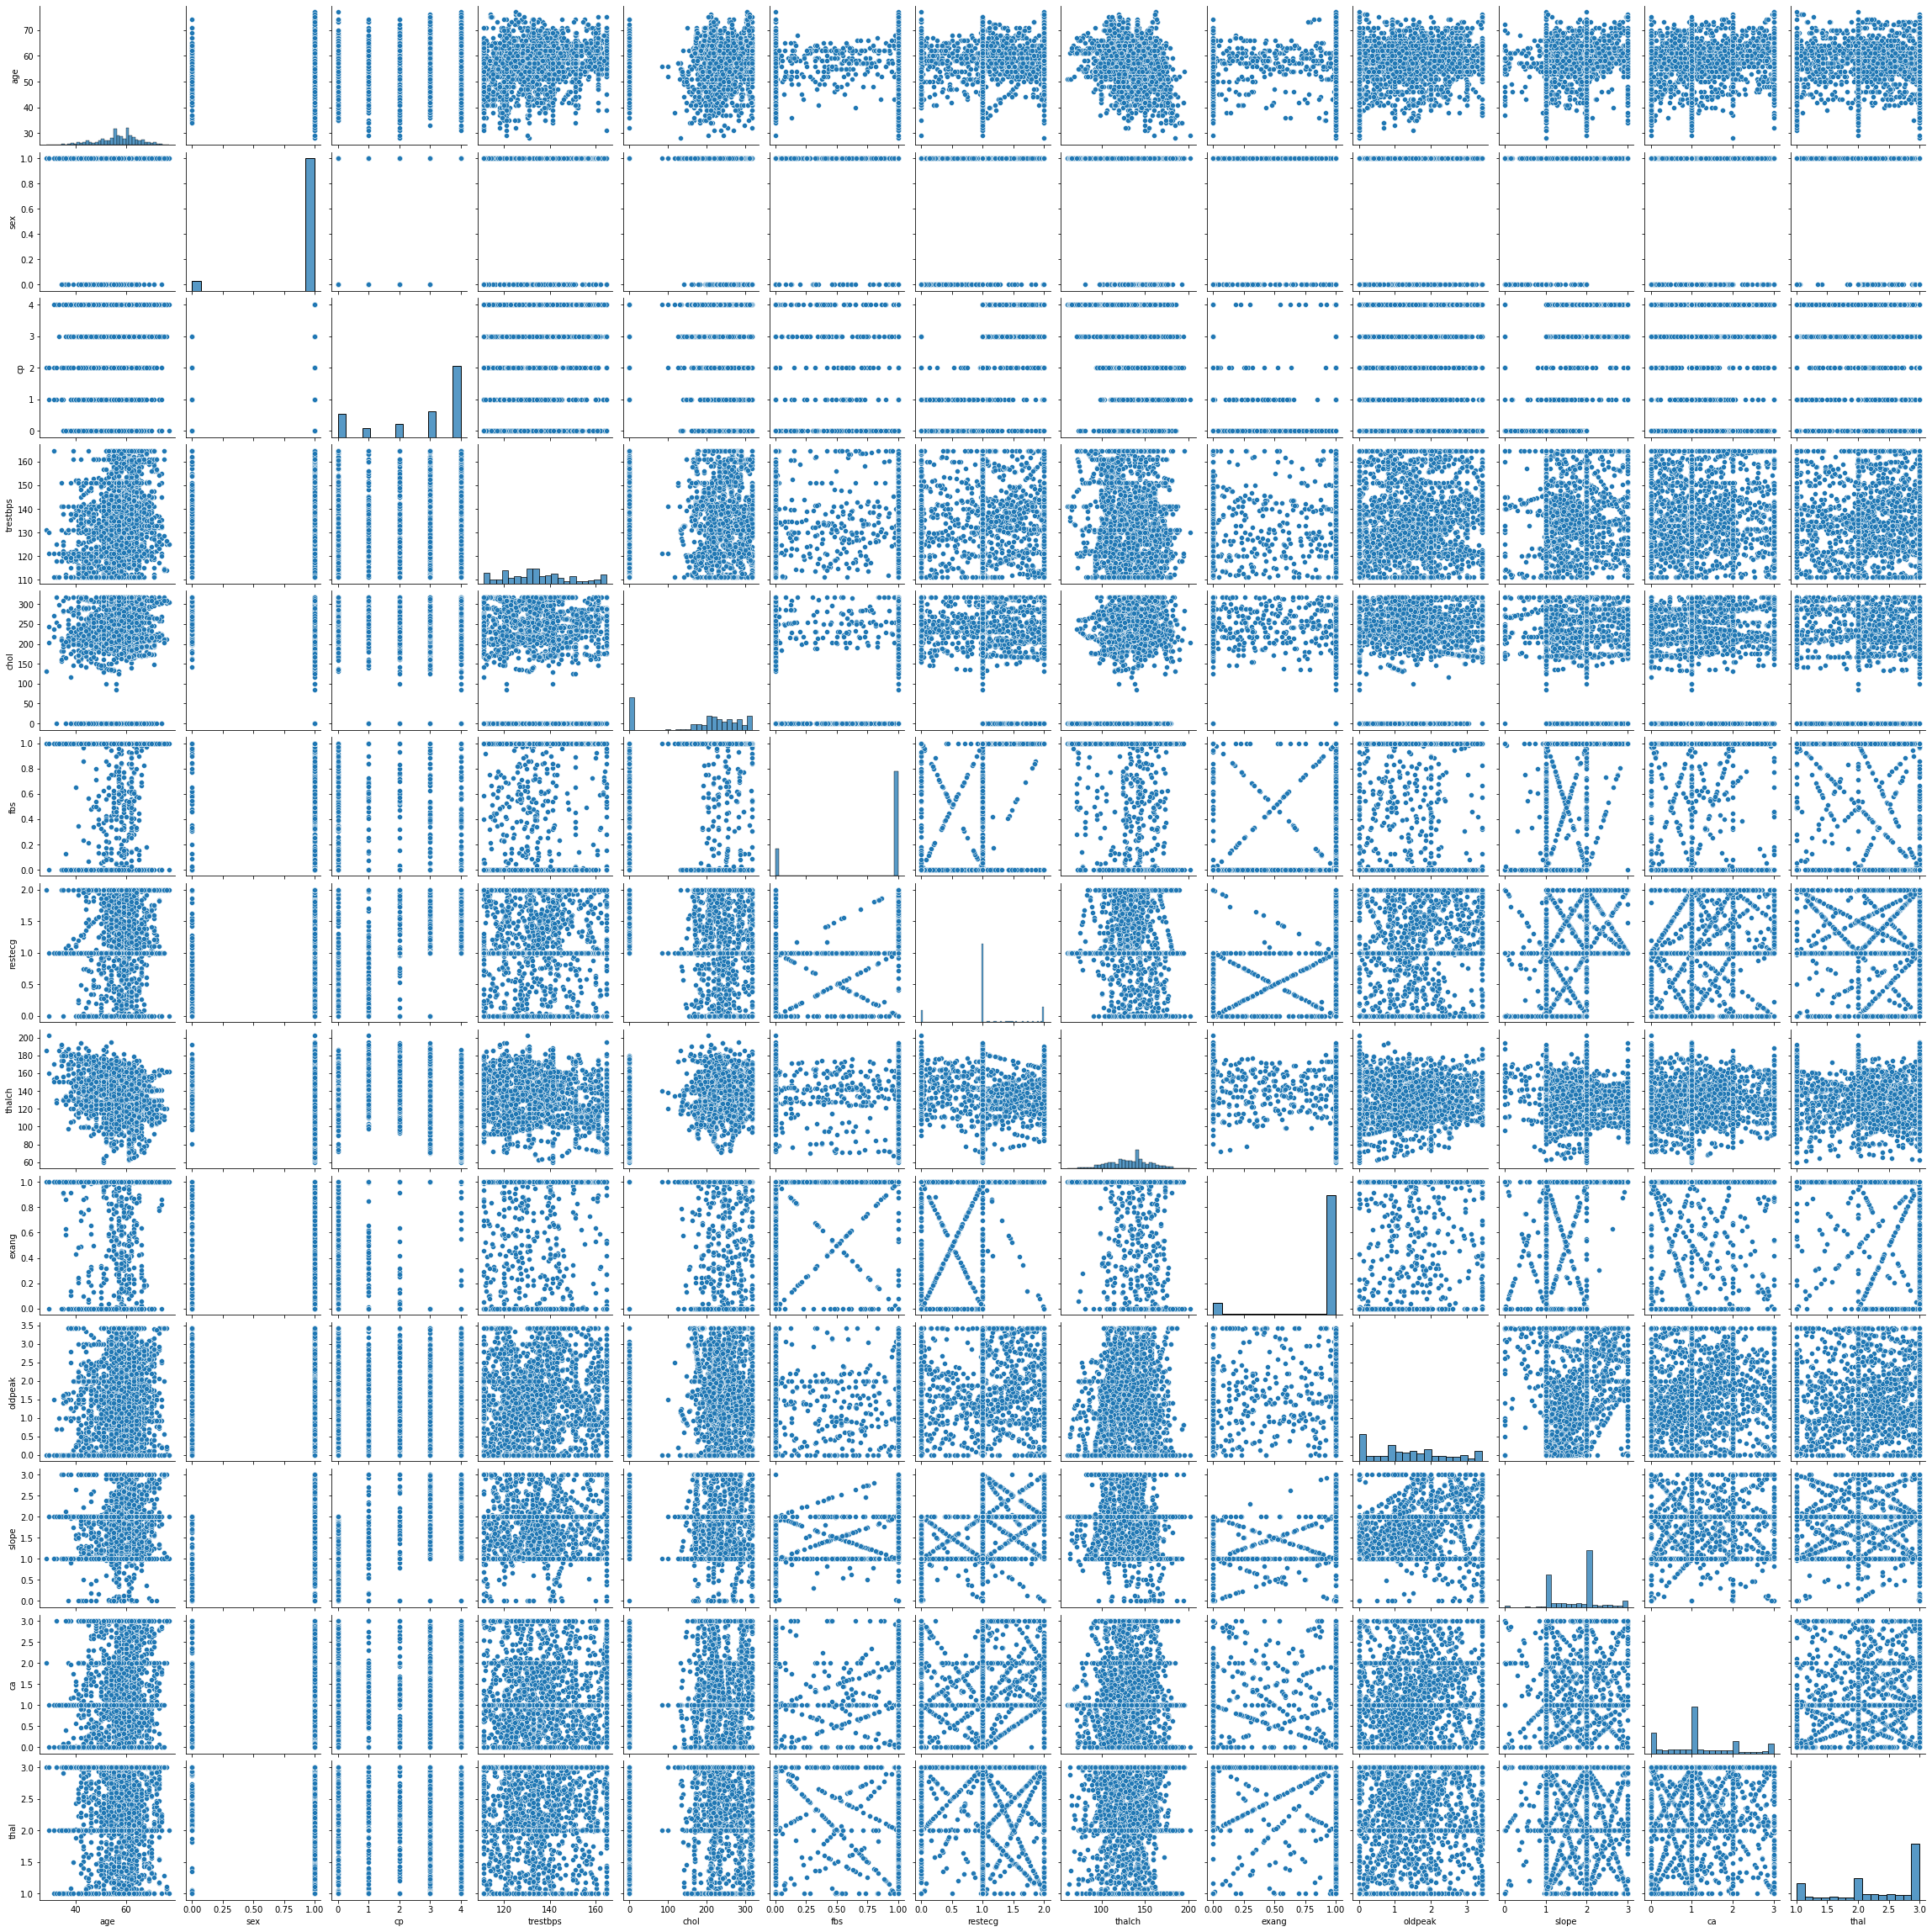

In [92]:
sns.pairplot(x_train)

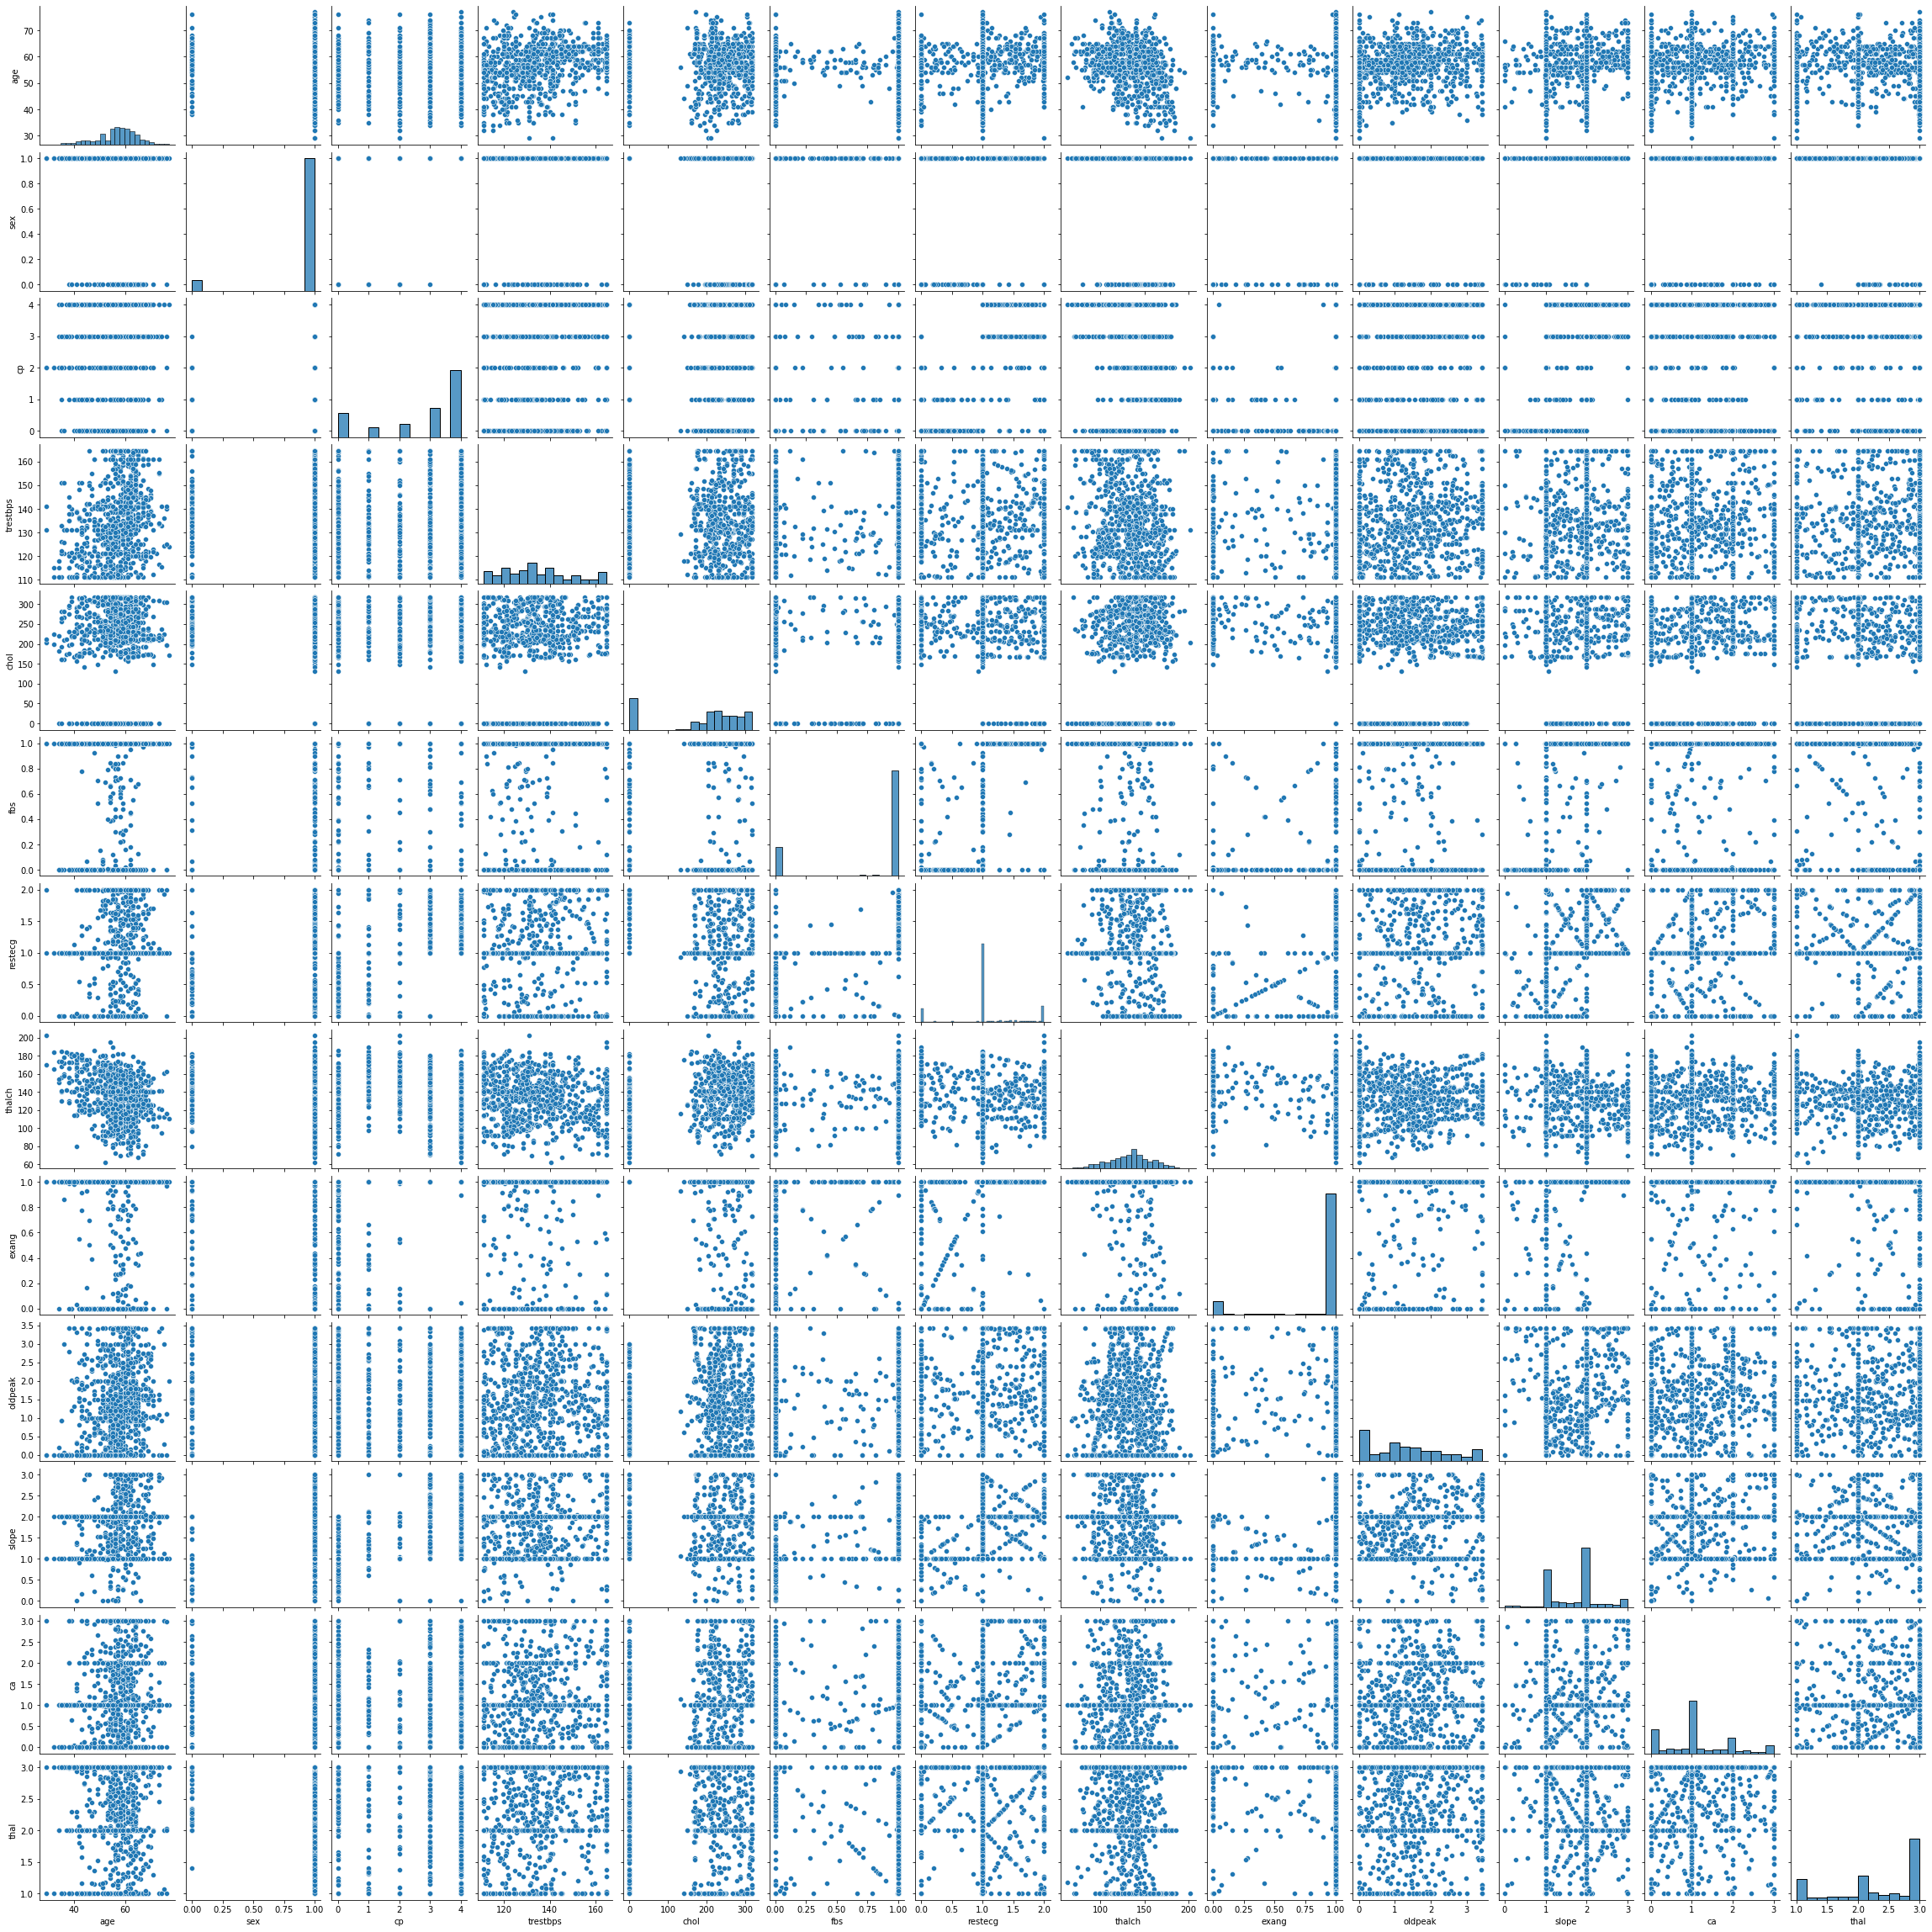

In [93]:
sns.pairplot(x_test)

## Heat map to represent the correlation of variables in clear manner

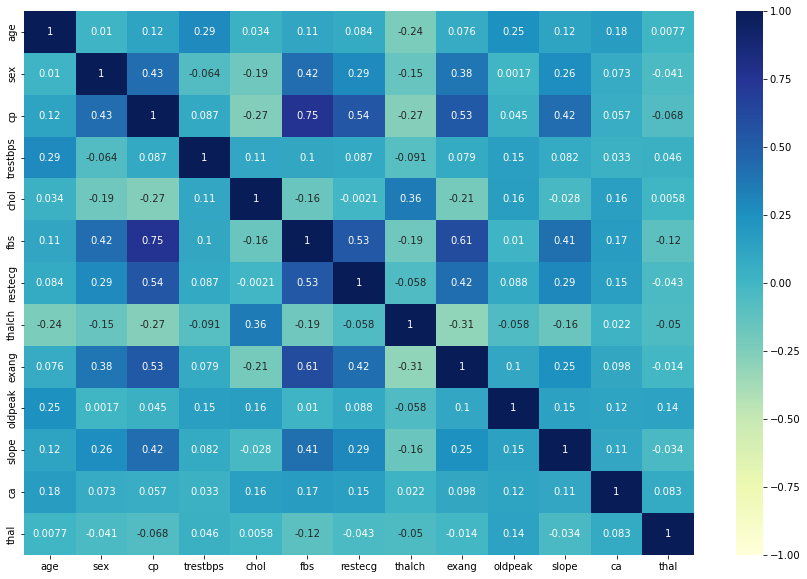

In [94]:
plt.figure(figsize=(15,10))
sns.heatmap(x_train.corr(),vmin=-1,vmax=1,cmap ='YlGnBu',annot=True)
plt.show()

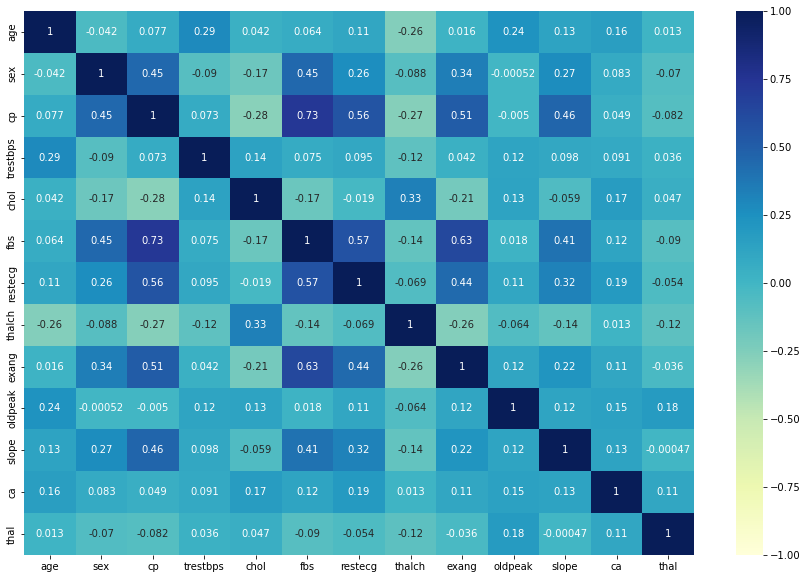

In [95]:
plt.figure(figsize=(15,10))
sns.heatmap(x_test.corr(),vmin=-1,vmax=1,cmap ='YlGnBu',annot=True)
plt.show()

## 9. feature scaling 

In [96]:
from sklearn.preprocessing import StandardScaler

In [97]:
sc= StandardScaler()

In [98]:
x_train  =  sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## 10. different model for implementation

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [100]:
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [101]:
def logistic_classifer (x_train,x_test,y_train,y_test):
    classifer_log = LogisticRegression(multi_class='auto')
    classifer_log.fit(x_train,y_train)
    y_pred = classifer_log.predict(x_test)
    
    return print(f"train accuracy: {classifer_log.score(x_train,y_train)}\ntest accuracy: {classifer_log.score(x_test,y_test)}")

In [102]:
def random_classifer (x_train,x_test,y_train,y_test):
    classifer_ran = RandomForestClassifier(criterion='entropy')
    classifer_ran.fit(x_train,y_train)
    y_pred = classifer_ran.predict(x_test)
    
    return print(f"train accuracy: {classifer_ran.score(x_train,y_train)}\ntest accuracy: {classifer_ran.score(x_test,y_test)}")
 

In [103]:
def nighhbor_classifer (x_train,x_test,y_train,y_test):
    classifer_nig = KNeighborsClassifier(metric="minkowski",p = 2,n_neighbors=5)
    classifer_nig.fit(x_train,y_train)
    y_pred = classifer_nig.predict(x_test)
    
    return print(f"train accuracy: {classifer_nig.score(x_train,y_train)}\ntest accuracy: {classifer_nig.score(x_test,y_test)}")

In [104]:
def navie_classifer (x_train,x_test,y_train,y_test):
    classifer_naive = GaussianNB()
    classifer_naive.fit(x_train,y_train)
    y_pred = classifer_naive.predict(x_test)
    
    return print(f"train accuracy: {classifer_naive.score(x_train,y_train)}\ntest accuracy: {classifer_naive.score(x_test,y_test)}")
    

In [105]:
def Xgboost_classifer (x_train,x_test,y_train,y_test):
    classifer_xg = XGBClassifier()
    classifer_xg.fit(x_train,y_train)
    y_pred = classifer_xg.predict(x_test)
    
    return print(f"train accuracy: {classifer_xg.score(x_train,y_train)}\ntest accuracy: {classifer_xg.score(x_test,y_test)}")

In [106]:
def svm_classifer (x_train,x_test,y_train,y_test):
    classifer_svm = SVC(C=1)
    classifer_svm.fit(x_train,y_train)
    y_pred = classifer_svm.predict(x_test)
    
    return print(f"train accuracy: {classifer_svm.score(x_train,y_train)}\ntest accuracy: {classifer_svm.score(x_test,y_test)}")

In [107]:
def print_score(x_train,x_test,y_train,y_test):
    print("logistic regression:\n")
    logistic_classifer(x_train,x_test,y_train,y_test)
    print("*"*100)
    print()
    
    print("random forest :\n")
    random_classifer(x_train,x_test,y_train,y_test)
    print("*"*100)
    print()
    
    print("K nearest neighbor:\n")
    nighhbor_classifer(x_train,x_test,y_train,y_test)
    print("*"*100)
    print()
    
    print("XGBoost:\n")
    Xgboost_classifer(x_train,x_test,y_train,y_test)
    print("*"*100)
    print()
    
    print("naviebayes:\n")
    navie_classifer(x_train,x_test,y_train,y_test)
    print("*"*100)
    print()
    
    print("svm:\n")
    svm_classifer(x_train,x_test,y_train,y_test)
    print("*"*100)
    print()
    

## 11. giving the data to the model and getting the accuracy

In [108]:
print_score(x_train,x_test,y_train,y_test)

logistic regression:

train accuracy: 0.5962575325087218
test accuracy: 0.6083650190114068
****************************************************************************************************

random forest :

train accuracy: 1.0
test accuracy: 0.9334600760456274
****************************************************************************************************

K nearest neighbor:

train accuracy: 0.9270535997462734
test accuracy: 0.8973384030418251
****************************************************************************************************

XGBoost:

train accuracy: 1.0
test accuracy: 0.9306083650190115
****************************************************************************************************

naviebayes:

train accuracy: 0.4081826831588963
test accuracy: 0.41064638783269963
****************************************************************************************************

svm:

train accuracy: 0.8797970187123375
test accuracy: 0.8384030418250951
****************

## so the randomforest algorithm is given the highest results so we are prepare model by using the randomforest algorithm

## 12.preparing the model

In [109]:
model = RandomForestClassifier()

In [110]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [111]:
y_train_predict = model.predict(x_train)
y_test_predict = model.predict(x_test)

In [112]:
accuracy_score(y_train,y_train_predict)

1.0

In [113]:
accuracy_score(y_test,y_test_predict)

0.935361216730038

In [114]:
confusion_matrix(y_train,y_train_predict)

array([[623,   0,   0,   0,   0],
       [  0, 610,   0,   0,   0],
       [  0,   0, 624,   0,   0],
       [  0,   0,   0, 663,   0],
       [  0,   0,   0,   0, 633]], dtype=int64)

In [115]:
confusion_matrix(y_test,y_test_predict)

array([[213,   5,   0,   0,   0],
       [  4, 202,  12,  12,   1],
       [  0,  12, 202,   3,   0],
       [  0,  12,   6, 160,   0],
       [  0,   1,   0,   0, 207]], dtype=int64)

In [116]:
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       623
           1       1.00      1.00      1.00       610
           2       1.00      1.00      1.00       624
           3       1.00      1.00      1.00       663
           4       1.00      1.00      1.00       633

    accuracy                           1.00      3153
   macro avg       1.00      1.00      1.00      3153
weighted avg       1.00      1.00      1.00      3153



In [117]:
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       218
           1       0.87      0.87      0.87       231
           2       0.92      0.93      0.92       217
           3       0.91      0.90      0.91       178
           4       1.00      1.00      1.00       208

    accuracy                           0.94      1052
   macro avg       0.94      0.94      0.94      1052
weighted avg       0.94      0.94      0.94      1052



## 13. saving the model

In [122]:
import pickle

In [124]:
with open ('./heart disease.pkl','wb') as f:
    pickle.dump(model,f)

In [2]:
import pickle

In [4]:
model = pickle.load(open('./heart disease.pkl','rb'))

In [5]:
model.predict([[63,1,1,145,233,1,2,150,1,2.3,3,1,2]])

array([3], dtype=int64)